# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from matplotlib.colors import LogNorm, Normalize
import torch
from torch import nn
# from torch import optim
# import torch.optim.lr_scheduler as lr_scheduler
# import torch.nn.functional as F
# from torchvision import transforms as T
from torchvision import models
from torch.utils.data import Dataset, DataLoader, Subset
from sklearn.metrics import confusion_matrix, roc_curve, auc, brier_score_loss
from sklearn.calibration import calibration_curve
from sklearn.manifold import TSNE, Isomap
import glob
from astropy.visualization import simple_norm
import os
#from torchvision.io import read_image
from tqdm import tqdm
import pandas as pd
# from pytorch_grad_cam import GradCAM
# from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
# from pytorch_grad_cam.utils.image import show_cam_on_image
# from torchsummary import summary
# from torchinfo import summary
from scipy.stats import binned_statistic
from photutils.segmentation import detect_threshold, detect_sources
from skimage.transform import resize
# import shutil
import umap.umap_ as umap # Recommended way to import UMAP
from matplotlib.colors import LinearSegmentedColormap
from torchvision.models.feature_extraction import create_feature_extractor, get_graph_node_names
from SetRandomSeed import set_random_seeds, GeneratorSeed
from zoobot.pytorch.training.finetune import FinetuneableZoobotClassifier

/n/home09/aschechter/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/n/home09/aschechter/.local/lib/python3.10/site-packages/lightning_fabric/__init__.py:41: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.


In [2]:
#do i want notebook to keep going onto tsne or stop after umap
tsne = 'no'

In [3]:
pd.set_option('display.max_columns', 40)
set_random_seeds(626)
g = GeneratorSeed(626)

In [4]:
# Set the figure size to match one column in AASTeX (3.25 inches width)
width = 3.25
height = 2.5 # height can vary, 2.5 inches is just a suggestion
matplotlib.rcParams["font.size"] = "10"


# Training Curves

In [5]:
# traininglossAdamWC = pd.read_pickle('AdamW_Cyclic_loss') 
# trainingaccAdamWC = pd.read_pickle('AdamW_Cyclic_acc') 

# traininglossAdamWR = pd.read_pickle('AdamW_Reduce_loss') 
# trainingaccAdamWR = pd.read_pickle('AdamW_Reduce_acc') 

traininglossAdamC = pd.read_pickle('Adam_Cyclic_loss') 
trainingaccAdamC = pd.read_pickle('Adam_Cyclic_acc') 

# traininglossAdamR = pd.read_pickle('Adam_Reduce_loss') 
# trainingaccAdamR = pd.read_pickle('Adam_Reduce_acc') 

# traininglossSGDC = pd.read_pickle('SGD_Cyclic_loss') 
# trainingaccSGDC = pd.read_pickle('SGD_Cyclic_acc') 

# traininglossSGDR = pd.read_pickle('SGD_Reduce_loss') 
# trainingaccSGDR = pd.read_pickle('SGD_Reduce_acc') 

#trainingacc['validation']

In [6]:
traininglossAdamC

{'train': [0.6690859517909576,
  0.6216587503107615,
  0.5929469606976117,
  0.5741932890836687,
  0.5593518622008412,
  0.5482656030680647,
  0.5396296421365055,
  0.5299065505605638,
  0.5183193898394041,
  0.5120037400770766,
  0.4990943551224414,
  0.4953982280253077,
  0.49008036234922575,
  0.4822385249189359,
  0.47512004314324796,
  0.46932017911783597,
  0.46260777518012425,
  0.45934536518194735,
  0.45215942019875716,
  0.4458638417978197,
  0.4422746801826796,
  0.4400158347549387,
  0.4286220148909591,
  0.4253578817072185,
  0.4189028509473994,
  0.41429440614826446,
  0.41371845913480326,
  0.4097300804095712,
  0.4024332419902529,
  0.3991724993938055,
  0.3936752855536426,
  0.39180268160244713,
  0.3801029940687532,
  0.3819009401055,
  0.37718530194318567,
  0.3738716267622434,
  0.3663996499479219],
 'validation': [0.6204956002782976,
  0.5829516901163774,
  0.5623459669581631,
  0.55002149526012,
  0.5401757964106838,
  0.5349913921082419,
  0.529803487815355,
  0.

In [7]:
cmap = matplotlib.colormaps['magma']

color1 = cmap(0.2)
color2 = cmap(0.3)
color3 = cmap(0.4)
color4 = cmap(0.5)
color5 = cmap(0.6)
color6 = cmap(0.7)

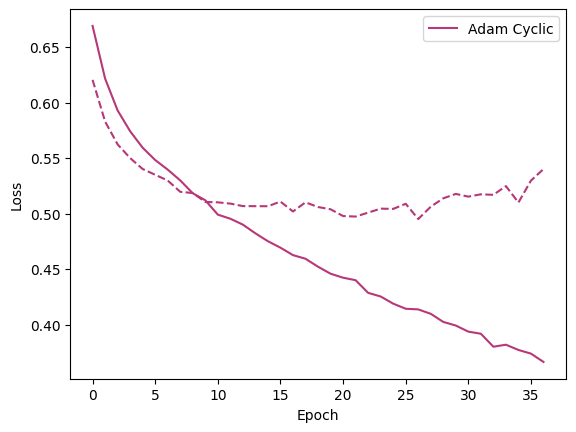

In [8]:
plt.figure()
# plt.plot(np.arange(0,len(traininglossAdamWC['train'])), traininglossAdamWC['train'], color = color1, label = 'AdamW Cyclic')
# plt.plot(np.arange(0,len(traininglossAdamWC['validation'])), traininglossAdamWC['validation'], linestyle = '--', color = color1)

# plt.plot(np.arange(0,len(traininglossAdamWR['train'])), traininglossAdamWR['train'], color = color2, label = 'AdamW Reduce')
# plt.plot(np.arange(0,len(traininglossAdamWR['validation'])), traininglossAdamWR['validation'], linestyle = '--', color = color2)

# plt.plot(np.arange(0,len(traininglossAdamR['train'])), traininglossAdamR['train'], color = color3, label = 'Adam Reduce')
# plt.plot(np.arange(0,len(traininglossAdamR['validation'])), traininglossAdamR['validation'], linestyle = '--', color = color3)

plt.plot(np.arange(0,len(traininglossAdamC['train'])), traininglossAdamC['train'], color = color4, label = 'Adam Cyclic')
plt.plot(np.arange(0,len(traininglossAdamC['validation'])), traininglossAdamC['validation'], linestyle = '--', color = color4)

# plt.plot(np.arange(0,len(traininglossSGDR['train'])), traininglossSGDR['train'], color = color5, label = 'SGD Reduce')
# plt.plot(np.arange(0,len(traininglossSGDR['validation'])), traininglossSGDR['validation'], linestyle = '--', color = color5)

# plt.plot(np.arange(0,len(traininglossSGDC['train'])), traininglossSGDC['train'], color = color6, label = 'SGD Cyclic')
# plt.plot(np.arange(0,len(traininglossSGDC['validation'])), traininglossSGDC['validation'], linestyle = '--', color = color6)

plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

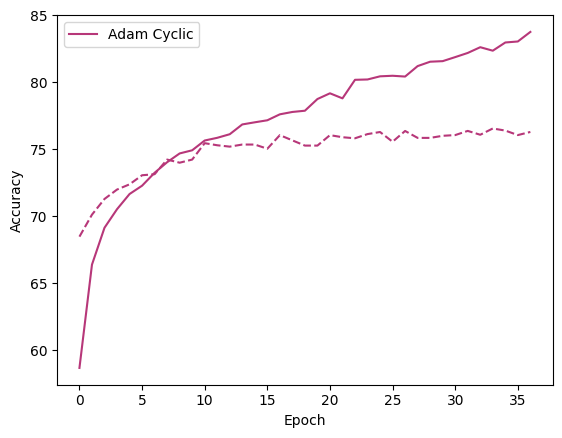

In [9]:
plt.figure()
# plt.plot(np.arange(0,len(trainingaccAdamWC['train'])), trainingaccAdamWC['train'], color = color1, label = 'AdamW Cyclic')
# plt.plot(np.arange(0,len(trainingaccAdamWC['validation'])), trainingaccAdamWC['validation'], linestyle = '--', color = color1)

# plt.plot(np.arange(0,len(trainingaccAdamWR['train'])), trainingaccAdamWR['train'], color = color2, label = 'AdamW Reduce')
# plt.plot(np.arange(0,len(trainingaccAdamWR['validation'])), trainingaccAdamWR['validation'], linestyle = '--', color = color2)

# plt.plot(np.arange(0,len(trainingaccAdamR['train'])), trainingaccAdamR['train'], color = color3, label = 'Adam Reduce')
# plt.plot(np.arange(0,len(trainingaccAdamR['validation'])), trainingaccAdamR['validation'], linestyle = '--', color = color3)

plt.plot(np.arange(0,len(trainingaccAdamC['train'])), trainingaccAdamC['train'], color = color4, label = 'Adam Cyclic')
plt.plot(np.arange(0,len(trainingaccAdamC['validation'])), trainingaccAdamC['validation'], linestyle = '--', color = color4)

# plt.plot(np.arange(0,len(trainingaccSGDR['train'])), trainingaccSGDR['train'], color = color5, label = 'SGD Reduce')
# plt.plot(np.arange(0,len(trainingaccSGDR['validation'])), trainingaccSGDR['validation'], linestyle = '--', color = color5)

# plt.plot(np.arange(0,len(trainingaccSGDC['train'])), trainingaccSGDC['train'], color = color6, label = 'SGD Cyclic')
# plt.plot(np.arange(0,len(trainingaccSGDC['validation'])), trainingaccSGDC['validation'], linestyle = '--', color = color6)

plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

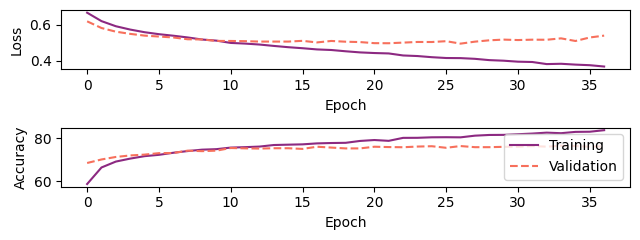

In [10]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize = (2*width, height))
ax1.plot(np.arange(0,len(traininglossAdamC['train'])), traininglossAdamC['train'], color = color3, label = 'Training')
ax1.plot(np.arange(0,len(traininglossAdamC['validation'])), traininglossAdamC['validation'], linestyle = '--', color = color6, label = 'Validation')

ax1.set_ylabel('Loss')
ax1.set_xlabel('Epoch')
#ax1.legend()

ax2.plot(np.arange(0,len(trainingaccAdamC['train'])), trainingaccAdamC['train'], color = color3, label = 'Training')
ax2.plot(np.arange(0,len(trainingaccAdamC['validation'])), trainingaccAdamC['validation'], linestyle = '--', color = color6, label = 'Validation')

ax2.set_ylabel('Accuracy')
ax2.set_xlabel('Epoch')
ax2.legend(loc = 4)

plt.tight_layout()
plt.savefig('AdamC_trainingmetrics.png', dpi = 300)
plt.show()

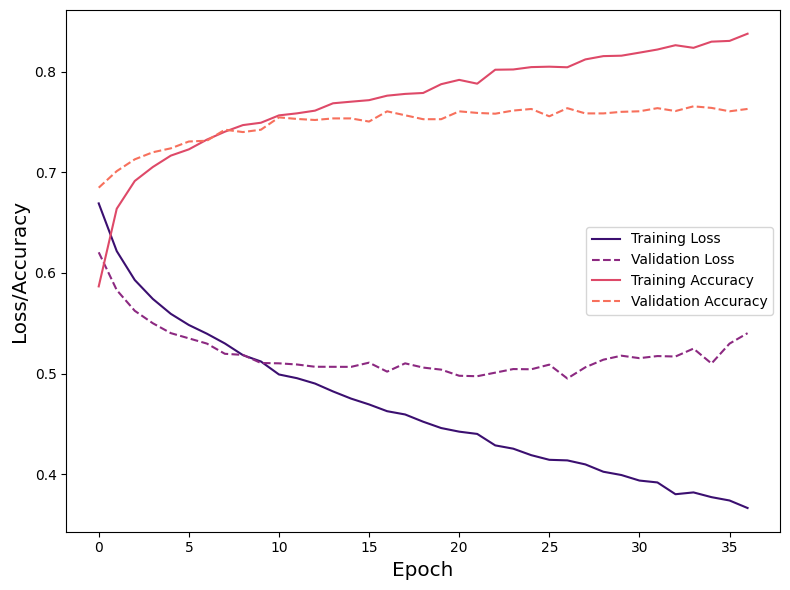

In [11]:
plt.figure(figsize = (8,6))
plt.plot(np.arange(0,len(traininglossAdamC['train'])), traininglossAdamC['train'], color = color1, label = 'Training Loss')
plt.plot(np.arange(0,len(traininglossAdamC['validation'])), traininglossAdamC['validation'], linestyle = '--', color = color3, label = 'Validation Loss')
#ax1.legend()

plt.plot(np.arange(0,len(trainingaccAdamC['train'])), np.array(trainingaccAdamC['train'])/100, color = color5, label = 'Training Accuracy')
plt.plot(np.arange(0,len(trainingaccAdamC['validation'])), np.array(trainingaccAdamC['validation'])/100, linestyle = '--', color = color6, label = 'Validation Accuracy')

plt.ylabel('Loss/Accuracy', fontsize = 'x-large')
plt.xlabel('Epoch', fontsize = 'x-large')
plt.xticks(fontsize='medium')
plt.yticks(fontsize='medium')
plt.legend(loc=5)

plt.tight_layout()
plt.savefig('lossANDacc_AdamC.png', dpi = 300)
plt.show()

# Read In Network

In [12]:
CNNName = 'Adam_Cyclic' #AdamW_Reduce #AdamW_Cyclic #Adam_Reduce #Adam_Cyclic #SGD_Reduce #SGD_Cyclic
# Load the saved model state
checkpoint = torch.load('ResNet_' + CNNName +'.pth', map_location=torch.device('cpu'))
model = models.resnet18(weights=True)
print("Best model was from epoch:", checkpoint['epoch'])
#Set up the model for inference
dropout_rate = 0.2
learning_rate = 1e-5
# model.fc = nn.Sequential(
#     nn.Dropout(dropout_rate),  # Add dropout here
#     nn.Linear(512, 256),
#     nn.ReLU(),
#     nn.Dropout(dropout_rate),
#     nn.Linear(256,2)# Adjust the output size to match your task (e.g., 2 classes)
# )

model = FinetuneableZoobotClassifier(name='hf_hub:mwalmsley/zoobot-encoder-resnet18', learning_rate=learning_rate,  # use a low learning rate
    lr_decay=0.5,  # reduce the learning rate from lr to lr^0.5 for each block deeper in the network
    # arguments specific to FinetuneableZoobotClassifier
    num_classes=2
)
  # Ensure the output layer is the same

# Load the model weights from the checkpoint
model.load_state_dict(checkpoint['model_state_dict'])
model = model.to('cpu')  # Ensure the model is on the correct device (GPU/CPU)
model.eval()  # Switch to evaluation mode

device = 'cuda' if torch.cuda.is_available() else 'cpu'

/n/home09/aschechter/.conda/envs/zoobot-py310/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Best model was from epoch: 26


/n/home09/aschechter/.conda/envs/zoobot-py310/lib/python3.10/site-packages/torch/_utils.py:776: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


In [13]:

# model_summary_latex = summary(model, input_size=(64, 3, 224, 224), output="latex")

# print(model_summary_latex)

In [14]:
from BinaryMergerDataset import BinaryMergerDataset, get_transforms
path = '/n/holystore01/LABS/hernquist_lab/Users/aschechter/z1widebinmocks/'
BATCH_SIZE = 64

cpu


In [15]:
test_mergers_dataset_orig = BinaryMergerDataset(path, 'test', mergers = True, transform = get_transforms(aug=False), codetest=False)
test_nonmergers_dataset_orig = BinaryMergerDataset(path, 'test', mergers = False, transform = get_transforms(aug=False), codetest=False)


test_dataset_full = torch.utils.data.ConcatDataset([test_mergers_dataset_orig, test_nonmergers_dataset_orig])
# Create a fixed permutation
indices = np.random.permutation(len(test_dataset_full))
shuffled_test_dataset = Subset(test_dataset_full, indices)

#test_dataloader = DataLoader(test_dataset_full, shuffle = False, num_workers = 0, batch_size=BATCH_SIZE)#num workers used to be 4
test_dataloader = DataLoader(shuffled_test_dataset, shuffle = False, num_workers = 0, batch_size=BATCH_SIZE, generator=g)#num workers used to be 4

train_mergers_dataset_augment = BinaryMergerDataset(path, 'train', mergers = True, transform = get_transforms(aug=True), codetest=False)
train_nonmergers_dataset_augment = BinaryMergerDataset(path, 'train', mergers = False, transform = get_transforms(aug=True), codetest=False)

train_mergers_dataset_orig = BinaryMergerDataset(path, 'train', mergers = True, transform = get_transforms(aug=False), codetest=False)
train_nonmergers_dataset_orig = BinaryMergerDataset(path, 'train', mergers = False, transform = get_transforms(aug=False), codetest=False)

train_dataset_full = torch.utils.data.ConcatDataset([train_mergers_dataset_augment, train_nonmergers_dataset_augment, train_mergers_dataset_orig, train_nonmergers_dataset_orig])
train_dataloader = DataLoader(train_dataset_full, shuffle = True, num_workers = 0, batch_size=BATCH_SIZE, generator=g)

validation_mergers_dataset_orig = BinaryMergerDataset(path, 'validation', mergers = True, transform = get_transforms(aug=False), codetest=False)
validation_nonmergers_dataset_orig = BinaryMergerDataset(path, 'validation', mergers = False, transform = get_transforms(aug=False), codetest=False)

validation_dataset_full = torch.utils.data.ConcatDataset([validation_mergers_dataset_orig, validation_nonmergers_dataset_orig])
validation_dataloader = DataLoader(validation_dataset_full, shuffle = False, num_workers = 0, batch_size=BATCH_SIZE, generator=g)#num workers used to be 4



In [16]:
print(len(train_mergers_dataset_orig) + len(train_mergers_dataset_augment))
print(len(train_nonmergers_dataset_orig) + len(train_nonmergers_dataset_augment))

print(len(validation_mergers_dataset_orig))
print(len(validation_nonmergers_dataset_orig))

print(len(test_mergers_dataset_orig))
print(len(test_nonmergers_dataset_orig))

5940
5916
630
624
630
630


In [17]:

def get_accuracy(pred,original):
    #pred = (torch.sigmoid(pred) > 0.5).float() #pred is now 0 or 1
    #pred = pred.numpy()
    #original = original.numpy()
    # print(type(pred))
    # print(type(original))
    # if type(pred) != type(original):
    #     return np.nan
    # else:
    #     return np.mean(pred == original) * 100
    print(pred, original)
    return np.mean(pred == original) * 100

def plot_confusion_matrix(cm, classes, epoch): #help from chat GPT
    plt.figure(figsize=(width, width))
    sns.heatmap(cm, annot=True, fmt=".2f", cmap='Purples', xticklabels=classes, yticklabels=classes, vmin = 0, vmax = 100,
                square = True, cbar_kws={'label': 'Percentage', "shrink": 0.65})
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    #plt.title('Confusion Matrix ' + str(epoch) + ' Set')
    plt.tight_layout()
    plt.savefig('ConfusionMatrix_TestSet_' + CNNName +'.png', dpi = 300, bbox_inches="tight")
    plt.show()

In [18]:
print(get_graph_node_names(model))
feature_extractor_model = create_feature_extractor(model, return_nodes={'encoder.fc': 'extracted_features',})

# Set the feature extractor model to evaluation mode
feature_extractor_model.eval()
feature_extractor_model.to(device)

(['x', 'encoder.conv1', 'encoder.bn1', 'encoder.act1', 'encoder.maxpool', 'encoder.layer1.0.conv1', 'encoder.layer1.0.bn1', 'encoder.layer1.0.drop_block', 'encoder.layer1.0.act1', 'encoder.layer1.0.aa', 'encoder.layer1.0.conv2', 'encoder.layer1.0.bn2', 'encoder.layer1.0.add', 'encoder.layer1.0.act2', 'encoder.layer1.1.conv1', 'encoder.layer1.1.bn1', 'encoder.layer1.1.drop_block', 'encoder.layer1.1.act1', 'encoder.layer1.1.aa', 'encoder.layer1.1.conv2', 'encoder.layer1.1.bn2', 'encoder.layer1.1.add', 'encoder.layer1.1.act2', 'encoder.layer2.0.conv1', 'encoder.layer2.0.bn1', 'encoder.layer2.0.drop_block', 'encoder.layer2.0.act1', 'encoder.layer2.0.aa', 'encoder.layer2.0.conv2', 'encoder.layer2.0.bn2', 'encoder.layer2.0.downsample.0', 'encoder.layer2.0.downsample.1', 'encoder.layer2.0.add', 'encoder.layer2.0.act2', 'encoder.layer2.1.conv1', 'encoder.layer2.1.bn1', 'encoder.layer2.1.drop_block', 'encoder.layer2.1.act1', 'encoder.layer2.1.aa', 'encoder.layer2.1.conv2', 'encoder.layer2.1.bn2

FinetuneableZoobotClassifier(
  (encoder): Module(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (act1): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Module(
      (0): Module(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (drop_block): Identity()
        (act1): ReLU(inplace=True)
        (aa): Identity()
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (act2): ReLU(inplace=True)
      )
      (1): Module(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padd

In [19]:
all_labels = []
all_preds = []
all_names = []
all_probabilities = []
all_logits = []
all_extracted_features = []
all_labels_for_isomap_plot = []

model.eval()
with torch.no_grad():  # No need to track gradients during inference
    for images, labels, names in tqdm(test_dataloader):
        #print(type(names))
        #images = torch.tensor(images, dtype=torch.float32).to(device)
        images = images.to(dtype=torch.float32).to(device) #already a torch tensor from dataloader
        #labels = torch.tensor(labels, dtype=torch.long).to(device)
        labels = labels.to(dtype=torch.long).to(device)
        # Forward pass
        outputs = model(images)
        all_logits.extend(outputs.cpu().numpy())
        features_dict = feature_extractor_model(images)
        features = features_dict['extracted_features']
        # print(f"\nBatch {i}:")
        # print(f"  Shape of features from avgpool (before flatten): {features.shape}")

        # The output of avgpool is usually [N, 512, 1, 1]. Flatten it.
        features = torch.flatten(features, 1) # Flattens to [N, 512]
        #print(f"  Shape of features after flatten: {features.shape}")
        all_extracted_features.extend(features.cpu().numpy())
        all_labels_for_isomap_plot.extend(labels.cpu().numpy())
        #print(outputs)
        #print(outputs.shape)
        probabilities = torch.softmax(outputs, dim=1)
        pred = torch.argmax(outputs, dim=1)   # Convert to binary (0 or 1)
        pred = pred.to(device=device) #dtype=torch.float32
        maxvals, pred_index = torch.max(outputs, 1)
        # Collect labels and predictions
        all_labels.extend(labels.cpu().numpy())
        all_preds.extend(pred.cpu().numpy())
        all_names.extend(names)
        all_probabilities.extend(probabilities.cpu().numpy())
# 4. Compute accuracy or other evaluation metrics (e.g., confusion matrix)
# Convert lists to numpy arrays
all_labels = np.array(all_labels)
#all_preds = np.squeeze(np.array(all_preds))
all_preds = np.array(all_preds)
all_names = np.array(all_names)
all_probabilities = np.array(all_probabilities)
all_logits = np.array(all_logits)
test_accuracy = get_accuracy(all_preds, all_labels)
all_extracted_features = np.array(all_extracted_features)
all_labels_for_isomap_plot = np.array(all_labels_for_isomap_plot)
#test_accuracy = np.mean(np.array(test_acc))
print(f"Test Accuracy: {test_accuracy:.2f}%")


100%|██████████| 20/20 [01:38<00:00,  4.90s/it]

[0 0 1 ... 0 0 1] [0 1 0 ... 0 0 1]
Test Accuracy: 77.54%


In [20]:
print(f"Test Accuracy: {test_accuracy:.2f}%")
print(test_accuracy)

print("Best model was from epoch:", checkpoint['epoch'])

Test Accuracy: 77.54%
77.53968253968254
Best model was from epoch: 26


In [21]:
# Convert lists to numpy arrays
all_labels = np.array(all_labels)
all_preds = np.array(all_preds)
all_names = np.array(all_names)

In [22]:
print(np.shape(all_labels))

(1260,)


In [23]:
print(np.shape(all_preds))

(1260,)


In [24]:
print(all_preds)

[0 0 1 ... 0 0 1]


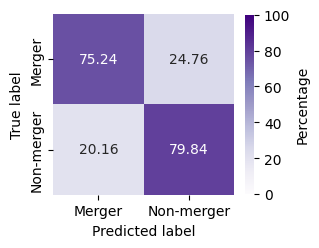

In [25]:
cm = confusion_matrix(all_labels, all_preds)
cmn = (cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]) *100 
TP, FN, FP, TN = cm.ravel()
plot_confusion_matrix(cmn, classes=['Merger', 'Non-merger'], epoch='Test')


In [26]:
purity = TP / (TP + FP)
completeness = TP / (TP + FN)
print(purity, completeness)

0.7886855241264559 0.7523809523809524


In [27]:
print(np.shape(all_labels))
print(np.shape(all_probabilities[:,0]))
print(np.max(all_probabilities[:,0]))

(1260,)
(1260,)
0.99787307


3.7326907e-05 inf
[9.97873068e-01 9.85556543e-01 9.85235214e-01 9.80473101e-01
 9.79659736e-01 9.76223767e-01 9.75398302e-01 9.72590625e-01
 9.71858442e-01 9.66879606e-01 9.66700017e-01 9.64496851e-01
 9.63810980e-01 9.63281512e-01 9.63207543e-01 9.54432905e-01
 9.54363048e-01 9.52947259e-01 9.52760220e-01 9.50441062e-01
 9.50362682e-01 9.39873636e-01 9.38441038e-01 9.34141874e-01
 9.34033811e-01 9.33480740e-01 9.33459938e-01 9.32326972e-01
 9.31608081e-01 9.29246664e-01 9.28574681e-01 9.21880186e-01
 9.21187103e-01 9.18810546e-01 9.18009579e-01 9.14580584e-01
 9.13471997e-01 9.12982881e-01 9.11639333e-01 9.09917712e-01
 9.08476651e-01 9.07547116e-01 9.06499326e-01 9.00302410e-01
 8.99490714e-01 8.93563986e-01 8.93214226e-01 8.87097061e-01
 8.86810184e-01 8.83586705e-01 8.83231819e-01 8.79837215e-01
 8.79466176e-01 8.75105917e-01 8.74533892e-01 8.73874426e-01
 8.73830080e-01 8.72053802e-01 8.68332863e-01 8.63425851e-01
 8.62629771e-01 8.60355079e-01 8.60055745e-01 8.59786630e-01
 8.589

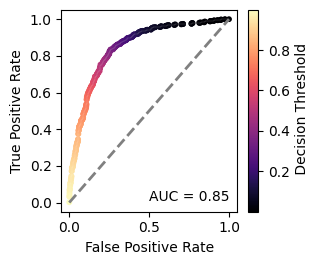

In [28]:
fpr, tpr, thresholds = roc_curve(all_labels, all_probabilities[:,0], pos_label=0)
area = auc(fpr, tpr)
print(np.min(thresholds), np.max(thresholds))
print(thresholds[1:])
#print(fpr, tpr, area)
# Plot ROC curve
plt.figure(figsize=(width, width-0.5))
plt.plot(fpr[1:], tpr[1:], color='white', lw=0.1)
sc = plt.scatter(fpr[1:], tpr[1:], c=thresholds[1:], cmap='magma', s=10)
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.colorbar(sc, label = ' Decision Threshold')
plt.annotate(text = 'AUC = %0.2f' % area, xy=(0.5,0.01))
#plt.title('ROC Test Set')
#plt.legend(loc="lower right", fontsize = 8)
plt.tight_layout()
plt.savefig('ROC_Test_' + CNNName + '.png', dpi = 300, bbox_inches="tight")
plt.show()

In [29]:
correct = []
for i in range(len(all_preds)):
    if all_preds[i] == all_labels[i]:
        correct.append('yes')
    else:
        correct.append('no')

In [30]:
string = '102575_1'
string[:-2]

'102575'

In [31]:
ClassificationInfo = pd.DataFrame(all_names, columns=['Image Name'])
ClassificationInfo['True Label'] = all_labels
ClassificationInfo['Predicted Label'] = all_preds
ClassificationInfo['Correct?'] = correct


ClassificationInfo

Image Name  True Label  Predicted Label Correct?
0      209243_2           0                0      yes
1      522373_1           1                0       no
2      167856_6           0                1       no
3      474784_2           0                0      yes
4      437412_6           0                1       no
...         ...         ...              ...      ...
1255   135873_5           1                1      yes
1256   576456_4           1                1      yes
1257   357887_2           0                0      yes
1258    87012_2           0                0      yes
1259   332258_2           1                1      yes

[1260 rows x 4 columns]

In [32]:
shids = []
for n in ClassificationInfo['Image Name']:
    #print(n[:-2])
    shids.append(n[:-2])
ClassificationInfo['SubhaloID'] = np.array(shids).astype(int)
shids = list(set(shids))
shids = np.array(shids).astype(int)
print(shids)

[163078 527829 342238 600936  79633 526934 696171 514427     36 603110
 209967 675083 184043 576456 533331 299152 223377 536542 470024 413070
 539924 496012 477675  36236 463603 659259 611832 249507 613626 437919
 610251 167856  25934 410422 458629 456641 544148 563042 628945 235672
 286306 522373 620813 571589 349693 497826  51917 619151 100102 347186
 267974 519340 463021 244922 453895 599111 412395 505778 463291 349396
 288783 459817 582874  87012 513935  55656 531709 540520 404548 502152
 412099 578264 438296 445318 653351 209243 532147      3  79612 523112
 526488 623829 329990 566503 584953 227630 495080 465345 229981 549500
 435395 592921 119693 474784 439679  74669 492232 626646 183287 510232
 133838 266035 486234 135873 510112 450792 595535 489239 511733 429842
 555091 408628 515835 304170 158778 167640 582942 227628 483393 473897
 559381 208269 263790 385059 375589 217566 502564     12 624061 571205
 678731 518941 541965 374191 636552 513041 492155 340254 544447 577979
  5192

In [33]:
shids.sort()
print(shids)
print(type(shids[0]))

[     3     12     16     36  25934  36234  36236  51917  51921  55656
  74669  79612  79633  87012 100102 119693 133838 135873 145449 158285
 158778 163078 167640 167856 168312 171738 171741 179012 179807 183287
 184043 186578 186581 197030 203574 207045 207053 208269 209243 209967
 217566 223377 227628 227630 229981 235672 239266 244922 248318 249507
 263790 266035 267974 270167 273824 285389 286306 288783 297404 299152
 299675 304170 308519 319900 329990 332258 338226 340254 342238 346813
 347186 349396 349693 357887 361774 366272 374191 375589 385059 389266
 393931 394377 396451 404548 408628 410422 412099 412395 413070 429842
 431683 431805 434122 435395 437412 437919 438296 439679 445318 445870
 450792 453895 456641 457265 458265 458629 459478 459817 463021 463291
 463603 465345 465702 470024 472772 473897 474784 477675 483393 486234
 489239 492155 492232 495080 496012 497826 499276 501001 502152 502560
 502564 505778 505878 510112 510232 511733 513041 513935 514427 515835
 51894

In [34]:
ClassificationInfo = ClassificationInfo.sort_values(by='SubhaloID')
ClassificationInfo

Image Name  True Label  Predicted Label Correct?  SubhaloID
836         3_5           1                1      yes          3
218         3_6           1                1      yes          3
781         3_3           1                1      yes          3
796         3_1           1                1      yes          3
627         3_2           1                0       no          3
...         ...         ...              ...      ...        ...
133    696171_2           1                1      yes     696171
1043   696171_4           1                1      yes     696171
1080   696171_6           1                0       no     696171
671    696171_3           1                1      yes     696171
179    696171_5           1                1      yes     696171

[1260 rows x 5 columns]

In [35]:
table40 = pd.read_csv('/n/home09/aschechter/code/SubhaloListForMakeMocks40.csv', usecols = ['Subfind_ID', 'Type'])
table50 = pd.read_csv('/n/home09/aschechter/code/SubhaloListForMakeMocks50.csv', usecols = ['Subfind_ID', 'Type'])
bigtable = pd.concat([table40, table50], ignore_index=False)
bigtable

Subfind_ID        Type
0         289514  Descendant
1         289514  Descendant
2         289514  Descendant
3         289514  Descendant
4         289514  Descendant
...          ...         ...
3115      118843         0.0
3116      118843         0.0
3117      118843         0.0
3118      118843         0.0
3119      118843         0.0

[8472 rows x 2 columns]

In [36]:
print(type(bigtable['Subfind_ID'][0]))
print(type(shids[0]))

<class 'pandas.core.series.Series'>
<class 'numpy.int64'>


In [37]:
types =[]
for s in shids:
    #print(type(s))
    limit = 6
    result = bigtable.loc[bigtable['Subfind_ID'] == s, 'Type'].values[0]
    print(result)
    while limit != 0:
        types.append(result)
        limit-=1
    

0.0
Descendant
0.0
0.0
0.0
Descendant
Descendant
first_progenitor
0.0
0.0
first_progenitor
Descendant
Merger
Merger
0.0
Descendant
Merger
0.0
Descendant
0.0
0.0
0.0
0.0
first_progenitor
next_progenitor
first_progenitor
first_progenitor
0.0
0.0
next_progenitor
Merger
first_progenitor
0.0
Descendant
first_progenitor
0.0
0.0
next_progenitor
Descendant
0.0
first_progenitor
Merger
Merger
0.0
next_progenitor
0.0
Descendant
0.0
Descendant
0.0
Descendant
0.0
0.0
0.0
0.0
0.0
first_progenitor
0.0
Descendant
0.0
0.0
first_progenitor
0.0
Descendant
Descendant
0.0
Merger
Descendant
Descendant
Descendant
0.0
Descendant
Descendant
Descendant
0.0
first_progenitor
0.0
0.0
next_progenitor
0.0
Descendant
0.0
next_progenitor
0.0
Merger
0.0
0.0
Descendant
first_progenitor
next_progenitor
0.0
first_progenitor
Descendant
first_progenitor
Descendant
0.0
0.0
0.0
Descendant
0.0
0.0
first_progenitor
Merger
0.0
0.0
Merger
Descendant
0.0
0.0
first_progenitor
0.0
0.0
Descendant
next_progenitor
0.0
0.0
Merger
0.0
fi

In [38]:
print(len(types))
ClassificationInfo['Type'] = types
ClassificationInfo

1260


Image Name  True Label  Predicted Label Correct?  SubhaloID Type
836         3_5           1                1      yes          3  0.0
218         3_6           1                1      yes          3  0.0
781         3_3           1                1      yes          3  0.0
796         3_1           1                1      yes          3  0.0
627         3_2           1                0       no          3  0.0
...         ...         ...              ...      ...        ...  ...
133    696171_2           1                1      yes     696171  0.0
1043   696171_4           1                1      yes     696171  0.0
1080   696171_6           1                0       no     696171  0.0
671    696171_3           1                1      yes     696171  0.0
179    696171_5           1                1      yes     696171  0.0

[1260 rows x 6 columns]

### Add Merger Mass Ratio

In [39]:
s_main = 40
s = 40
Subfind_ID_mergers40 = np.loadtxt('/n/holystore01/LABS/hernquist_lab/Users/aschechter/TNGProjects/merger_tables/' + str(s_main) + '/all_mergers_at_' + str(s) + '_enviro.txt', 
                                    skiprows = 1, usecols = 1, dtype = int)
Subfind_ID_nonmergers40 = np.loadtxt('/n/holystore01/LABS/hernquist_lab/Users/aschechter/TNGProjects/merger_tables/' + str(s_main) + '/nonmergers_matched_at_' + str(s) + '_no_enviro.txt', 
                                    skiprows = 1, usecols = 1, dtype = int)
q_mergers40 = np.loadtxt('/n/holystore01/LABS/hernquist_lab/Users/aschechter/TNGProjects/merger_tables/' + str(s_main) + '/all_mergers_at_' + str(s) + '_enviro.txt', 
                                    skiprows = 1, usecols = 3, dtype = float)
sm_mergers40 = np.loadtxt('/n/holystore01/LABS/hernquist_lab/Users/aschechter/TNGProjects/merger_tables/' + str(s_main) + '/all_mergers_at_' + str(s) + '_enviro.txt', 
                                    skiprows = 1, usecols = 5, dtype = float)
sm_nonmergers40 = np.loadtxt('/n/holystore01/LABS/hernquist_lab/Users/aschechter/TNGProjects/merger_tables/' + str(s_main) + '/nonmergers_matched_at_' + str(s) + '_no_enviro.txt', 
                                    skiprows = 1, usecols = 2, dtype = float)
sfr_mergers40 = np.loadtxt('/n/holystore01/LABS/hernquist_lab/Users/aschechter/TNGProjects/merger_tables/' + str(s_main) + '/all_mergers_at_' + str(s) + '_enviro.txt', 
                                    skiprows = 1, usecols = 8, dtype = float)
sfr_nonmergers40 = np.loadtxt('/n/holystore01/LABS/hernquist_lab/Users/aschechter/TNGProjects/merger_tables/' + str(s_main) + '/nonmergers_matched_at_' + str(s) + '_no_enviro.txt', 
                                    skiprows = 1, usecols = 3, dtype = float)

s_main = 50
s = 50
Subfind_ID_mergers50 = np.loadtxt('/n/holystore01/LABS/hernquist_lab/Users/aschechter/TNGProjects/merger_tables/' + str(s_main) + '/all_mergers_at_' + str(s) + '_enviro.txt', 
                                    skiprows = 1, usecols = 1, dtype = int)
Subfind_ID_nonmergers50 = np.loadtxt('/n/holystore01/LABS/hernquist_lab/Users/aschechter/TNGProjects/merger_tables/' + str(s_main) + '/nonmergers_matched_at_' + str(s) + '_no_enviro.txt', 
                                    skiprows = 1, usecols = 1, dtype = int)
q_mergers50 = np.loadtxt('/n/holystore01/LABS/hernquist_lab/Users/aschechter/TNGProjects/merger_tables/' + str(s_main) + '/all_mergers_at_' + str(s) + '_enviro.txt', 
                                    skiprows = 1, usecols = 3, dtype = float)
sm_mergers50 = np.loadtxt('/n/holystore01/LABS/hernquist_lab/Users/aschechter/TNGProjects/merger_tables/' + str(s_main) + '/all_mergers_at_' + str(s) + '_enviro.txt', 
                                    skiprows = 1, usecols = 5, dtype = float)
sm_nonmergers50 = np.loadtxt('/n/holystore01/LABS/hernquist_lab/Users/aschechter/TNGProjects/merger_tables/' + str(s_main) + '/nonmergers_matched_at_' + str(s) + '_no_enviro.txt', 
                                    skiprows = 1, usecols = 2, dtype = float)
sfr_mergers50 = np.loadtxt('/n/holystore01/LABS/hernquist_lab/Users/aschechter/TNGProjects/merger_tables/' + str(s_main) + '/all_mergers_at_' + str(s) + '_enviro.txt', 
                                    skiprows = 1, usecols = 8, dtype = float)
sfr_nonmergers50 = np.loadtxt('/n/holystore01/LABS/hernquist_lab/Users/aschechter/TNGProjects/merger_tables/' + str(s_main) + '/nonmergers_matched_at_' + str(s) + '_no_enviro.txt', 
                                    skiprows = 1, usecols = 3, dtype = float)

In [40]:
#print(sfr_nonmergers40)

In [41]:
print()

In [42]:
q= []
sm = []
sfr = []
Subfind_ID = np.concatenate((Subfind_ID_mergers40, Subfind_ID_mergers50))
Subfind_ID_nonmergers = np.concatenate((Subfind_ID_nonmergers40, Subfind_ID_nonmergers50))
q_mergers = np.concatenate((q_mergers40, q_mergers50))
sm_mergers = np.concatenate((sm_mergers40, sm_mergers50))
sm_nonmergers = np.concatenate((sm_nonmergers40, sm_nonmergers50))
sfr_mergers = np.concatenate((sfr_mergers40, sfr_mergers50))
sfr_nonmergers = np.concatenate((sfr_nonmergers40, sfr_nonmergers50))
for s in shids:
    #print(type(s))
    limit = 6
    if s in Subfind_ID:
        index = np.where(Subfind_ID == s)[0][0]
        #print(index[0][0])
        ratio = q_mergers[index]
        stellarmass = np.log10(sm_mergers[index])
        starformation = sfr_mergers[index]
        if ratio < 1:
            while limit != 0:
                q.append(ratio)
                sm.append(stellarmass) 
                sfr.append(starformation)
                limit-=1     
        else:
            while limit != 0:
                q.append(1/ratio)
                sm.append(stellarmass) 
                sfr.append(starformation)
                limit-=1
    else:
        index = np.where(Subfind_ID_nonmergers == s)[0][0]
        while limit != 0:
            q.append(0.0)
            stellarmass = np.log10(sm_nonmergers[index])
            sm.append(stellarmass) 
            starformation = sfr_nonmergers[index]
            sfr.append(starformation)
            limit-=1

q_name = []
for r in q:
    if r== 0.0:
        q_name.append('non')
    elif r >= 0.25:
        q_name.append('major')
    else: 
        q_name.append('minor')
#print(len(q))
ClassificationInfo['Mass Ratio'] = q
ClassificationInfo['Ratio Name'] = q_name
ClassificationInfo['Stellar Mass'] = sm
ClassificationInfo['SFR'] = sfr

In [43]:
ClassificationInfo

Image Name  True Label  Predicted Label Correct?  SubhaloID Type  \
836         3_5           1                1      yes          3  0.0   
218         3_6           1                1      yes          3  0.0   
781         3_3           1                1      yes          3  0.0   
796         3_1           1                1      yes          3  0.0   
627         3_2           1                0       no          3  0.0   
...         ...         ...              ...      ...        ...  ...   
133    696171_2           1                1      yes     696171  0.0   
1043   696171_4           1                1      yes     696171  0.0   
1080   696171_6           1                0       no     696171  0.0   
671    696171_3           1                1      yes     696171  0.0   
179    696171_5           1                1      yes     696171  0.0   

      Mass Ratio Ratio Name  Stellar Mass       SFR  
836          0.0        non     10.993829  3.223145  
218          0.0        non     10.993829  3.223145  
781          0.0        non     10.993829  3.223145  
796          0.0        non     10.993829  3.223145  
627          0.0        non     10.993829  3.223145  
...          ...        ...           ...       ...  
133          0.0        non      7.979035  0.045210  
1043         0.0        non      7.979035  0.045210  
1080         0.0        non      7.979035  0.045210  
671          0.0        non      7.979035  0.045210  
179          0.0        non      7.979035  0.045210  

[1260 rows x 10 columns]

In [44]:
p_class = []
t_class = []

for l in ClassificationInfo['True Label']:
    if l == 0.0:
        t_class.append('merger')
    else:
        t_class.append('nonmerger')

for l in ClassificationInfo['Predicted Label']:
    if l == 0.0:
        p_class.append('merger')
    else:
        p_class.append('nonmerger')

ClassificationInfo['True Class'] = t_class
ClassificationInfo['Predicted Class'] = p_class

In [45]:
ClassificationInfo = ClassificationInfo.loc[:, ['SubhaloID', 'Image Name', 'True Class', 'Predicted Class', 'True Label', 'Predicted Label', 'Correct?', 'Type', 'Mass Ratio', 'Ratio Name', 'Stellar Mass', 'SFR']]

In [46]:
ClassificationInfo

SubhaloID Image Name True Class Predicted Class  True Label  \
836           3        3_5  nonmerger       nonmerger           1   
218           3        3_6  nonmerger       nonmerger           1   
781           3        3_3  nonmerger       nonmerger           1   
796           3        3_1  nonmerger       nonmerger           1   
627           3        3_2  nonmerger          merger           1   
...         ...        ...        ...             ...         ...   
133      696171   696171_2  nonmerger       nonmerger           1   
1043     696171   696171_4  nonmerger       nonmerger           1   
1080     696171   696171_6  nonmerger          merger           1   
671      696171   696171_3  nonmerger       nonmerger           1   
179      696171   696171_5  nonmerger       nonmerger           1   

      Predicted Label Correct? Type  Mass Ratio Ratio Name  Stellar Mass  \
836                 1      yes  0.0         0.0        non     10.993829   
218                 1      yes  0.0         0.0        non     10.993829   
781                 1      yes  0.0         0.0        non     10.993829   
796                 1      yes  0.0         0.0        non     10.993829   
627                 0       no  0.0         0.0        non     10.993829   
...               ...      ...  ...         ...        ...           ...   
133                 1      yes  0.0         0.0        non      7.979035   
1043                1      yes  0.0         0.0        non      7.979035   
1080                0       no  0.0         0.0        non      7.979035   
671                 1      yes  0.0         0.0        non      7.979035   
179                 1      yes  0.0         0.0        non      7.979035   

           SFR  
836   3.223145  
218   3.223145  
781   3.223145  
796   3.223145  
627   3.223145  
...        ...  
133   0.045210  
1043  0.045210  
1080  0.045210  
671   0.045210  
179   0.045210  

[1260 rows x 12 columns]

In [47]:
ClassificationInfo.to_csv('CNN_ResultsTable_' + CNNName + '.csv', index=False)

#### How do we do on major vs minor mergers?

In [48]:
allmergers = ClassificationInfo[ClassificationInfo['Mass Ratio'] != 0.0]
allmergers_correct = allmergers[allmergers['Correct?'] == 'yes']
allmergers_accuracy = np.round(len(allmergers_correct)/len(allmergers) *100, 2)
print(allmergers_accuracy)

75.24


In [49]:
major = ClassificationInfo[ClassificationInfo['Ratio Name'] == 'major']
minor = ClassificationInfo[ClassificationInfo['Ratio Name'] == 'minor']
non = ClassificationInfo[ClassificationInfo['Ratio Name'] == 'non']

major_correct = major[major['Correct?'] == 'yes']
minor_correct = minor[minor['Correct?'] == 'yes']
non_correct = non[non['Correct?'] == 'yes']

major_accuracy = np.round(len(major_correct)/len(major) *100, 2)
minor_accuracy = np.round(len(minor_correct)/len(minor)*100, 2)
non_accuracy = np.round(len(non_correct)/len(non)*100, 2)

print(major_accuracy)
print(minor_accuracy)
print(non_accuracy)

76.95
73.85
79.84


In [50]:
corrects = ClassificationInfo[ClassificationInfo['Correct?'] == 'yes']
print(len(corrects)/len(ClassificationInfo))

0.7753968253968254


#### How do we do on different merger stages?

In [51]:
merger= ClassificationInfo[ClassificationInfo['Type'] == 'Merger']
early = ClassificationInfo[(ClassificationInfo['Type'] == 'first_progenitor') | (ClassificationInfo['Type'] == 'next_progenitor')] #| is or but better for this case
late = ClassificationInfo[ClassificationInfo['Type'] == 'Descendant']

merger_correct = merger[merger['Correct?'] == 'yes']
early_correct = early[early['Correct?'] == 'yes']
late_correct = late[late['Correct?'] == 'yes']

merger_accuracy = np.round(len(merger_correct)/len(merger) *100,2)
early_accuracy = np.round(len(early_correct)/len(early)*100,2)
late_accuracy = np.round(len(late_correct)/len(late)*100,2)



print(merger_accuracy)
print(early_accuracy)
print(late_accuracy)

79.17
81.85
65.83


In [52]:
post = ClassificationInfo[(ClassificationInfo['Type'] == 'Merger') | (ClassificationInfo['Type'] == 'Descendant')] #| is or but better for this case
post_correct = post[post['Correct?'] == 'yes']
post_accuracy = len(post_correct)/len(post)
print(post_accuracy)

0.7027777777777777


# Which galaxies are classified correctly from every angle?

In [53]:
every_angle_correct = []
for s in shids:
    s = s.astype(str)
    angle1 = s+'_1'
    angle2 = s+'_2'
    angle3 = s+'_3'
    angle4 = s+'_4'
    angle5 = s+'_5'
    angle6 = s+'_6'
    a1 = ClassificationInfo[ClassificationInfo['Image Name'] == angle1]
    a2 = ClassificationInfo[ClassificationInfo['Image Name'] == angle2]
    a3 = ClassificationInfo[ClassificationInfo['Image Name'] == angle3]
    a4 = ClassificationInfo[ClassificationInfo['Image Name'] == angle4]
    a5 = ClassificationInfo[ClassificationInfo['Image Name'] == angle5]
    a6 = ClassificationInfo[ClassificationInfo['Image Name'] == angle6]
    
    if a1['Correct?'].values[0] == 'yes' and a2['Correct?'].values[0] == 'yes' and a2['Correct?'].values[0] == 'yes'\
        and a4['Correct?'].values[0] == 'yes' and a5['Correct?'].values[0] == 'yes' and a6['Correct?'].values[0] == 'yes':
        every_angle_correct.append(int(s))
    #print(a1['Correct?'].values[0])
#ClassificationInfo

In [54]:
print(every_angle_correct)

[36, 25934, 51921, 55656, 100102, 133838, 135873, 145449, 158778, 163078, 167640, 168312, 179807, 183287, 186578, 186581, 208269, 209967, 217566, 227630, 235672, 244922, 248318, 249507, 266035, 267974, 270167, 299152, 308519, 332258, 338226, 340254, 342238, 346813, 349396, 349693, 357887, 361774, 366272, 374191, 375589, 385059, 389266, 396451, 404548, 408628, 413070, 431805, 434122, 438296, 445870, 450792, 453895, 457265, 458629, 459478, 459817, 470024, 472772, 473897, 474784, 483393, 489239, 492155, 492232, 499276, 502152, 502560, 502564, 510112, 511733, 513041, 513935, 514427, 515835, 523112, 524157, 526488, 527829, 531792, 531893, 533331, 540685, 541965, 543137, 544148, 544447, 549751, 551370, 553283, 563042, 576456, 582874, 582942, 584953, 592921, 593704, 599111, 600936, 613626, 620813, 623829, 624061, 626646, 636552, 646684, 653351, 659259, 667382, 683469]


In [55]:
EveryAngleCorrect = ClassificationInfo[ClassificationInfo['SubhaloID'].isin(every_angle_correct)]
EveryAngleCorrect

SubhaloID Image Name True Class Predicted Class  True Label  \
69           36       36_3  nonmerger          merger           1   
937          36       36_5  nonmerger       nonmerger           1   
1010         36       36_4  nonmerger       nonmerger           1   
385          36       36_6  nonmerger       nonmerger           1   
876          36       36_1  nonmerger       nonmerger           1   
...         ...        ...        ...             ...         ...   
792      683469   683469_6  nonmerger       nonmerger           1   
366      683469   683469_3  nonmerger       nonmerger           1   
1044     683469   683469_2  nonmerger       nonmerger           1   
1105     683469   683469_5  nonmerger       nonmerger           1   
205      683469   683469_4  nonmerger       nonmerger           1   

      Predicted Label Correct? Type  Mass Ratio Ratio Name  Stellar Mass  \
69                  0       no  0.0         0.0        non      8.679850   
937                 1      yes  0.0         0.0        non      8.679850   
1010                1      yes  0.0         0.0        non      8.679850   
385                 1      yes  0.0         0.0        non      8.679850   
876                 1      yes  0.0         0.0        non      8.679850   
...               ...      ...  ...         ...        ...           ...   
792                 1      yes  0.0         0.0        non      8.337241   
366                 1      yes  0.0         0.0        non      8.337241   
1044                1      yes  0.0         0.0        non      8.337241   
1105                1      yes  0.0         0.0        non      8.337241   
205                 1      yes  0.0         0.0        non      8.337241   

           SFR  
69    0.315019  
937   0.315019  
1010  0.315019  
385   0.315019  
876   0.315019  
...        ...  
792   0.047232  
366   0.047232  
1044  0.047232  
1105  0.047232  
205   0.047232  

[660 rows x 12 columns]

In [56]:
EveryAngleCorrect.to_csv('EveryAngleCorrect_' + CNNName + '.csv', index=False)

# Which galaxies are classified wrong from every angle?

In [57]:
every_angle_wrong = []
for s in shids:
    s = s.astype(str)
    angle1 = s+'_1'
    angle2 = s+'_2'
    angle3 = s+'_3'
    angle4 = s+'_4'
    angle5 = s+'_5'
    angle6 = s+'_6'
    a1 = ClassificationInfo[ClassificationInfo['Image Name'] == angle1]
    a2 = ClassificationInfo[ClassificationInfo['Image Name'] == angle2]
    a3 = ClassificationInfo[ClassificationInfo['Image Name'] == angle3]
    a4 = ClassificationInfo[ClassificationInfo['Image Name'] == angle4]
    a5 = ClassificationInfo[ClassificationInfo['Image Name'] == angle5]
    a6 = ClassificationInfo[ClassificationInfo['Image Name'] == angle6]
    
    if a1['Correct?'].values[0] == 'no' and a2['Correct?'].values[0] == 'no' and a2['Correct?'].values[0] == 'no'\
        and a4['Correct?'].values[0] == 'no' and a5['Correct?'].values[0] == 'no' and a6['Correct?'].values[0] == 'no':
        every_angle_wrong.append(int(s))
    #print(a1['Correct?'].values[0])
#ClassificationInfo
print(every_angle_wrong)

[36234, 74669, 179012, 207053, 439679, 463021, 463603, 465345, 510232, 518941, 555091, 619151]


In [58]:
EveryAngleWrong = ClassificationInfo[ClassificationInfo['SubhaloID'].isin(every_angle_wrong)]
EveryAngleWrong

SubhaloID Image Name True Class Predicted Class  True Label  \
624       36234    36234_4     merger       nonmerger           0   
348       36234    36234_5     merger       nonmerger           0   
259       36234    36234_6     merger       nonmerger           0   
1156      36234    36234_2     merger       nonmerger           0   
1223      36234    36234_3     merger       nonmerger           0   
...         ...        ...        ...             ...         ...   
1185     619151   619151_1     merger       nonmerger           0   
661      619151   619151_6     merger       nonmerger           0   
309      619151   619151_3     merger          merger           0   
200      619151   619151_4     merger       nonmerger           0   
518      619151   619151_5     merger       nonmerger           0   

      Predicted Label Correct?        Type  Mass Ratio Ratio Name  \
624                 1       no  Descendant    0.311275      major   
348                 1       no  Descendant    0.311275      major   
259                 1       no  Descendant    0.311275      major   
1156                1       no  Descendant    0.311275      major   
1223                1       no  Descendant    0.311275      major   
...               ...      ...         ...         ...        ...   
1185                1       no  Descendant    0.262828      major   
661                 1       no  Descendant    0.262828      major   
309                 0      yes  Descendant    0.262828      major   
200                 1       no  Descendant    0.262828      major   
518                 1       no  Descendant    0.262828      major   

      Stellar Mass        SFR  
624      11.694368  15.514295  
348      11.694368  15.514295  
259      11.694368  15.514295  
1156     11.694368  15.514295  
1223     11.694368  15.514295  
...            ...        ...  
1185      7.957106   0.026150  
661       7.957106   0.026150  
309       7.957106   0.026150  
200       7.957106   0.026150  
518       7.957106   0.026150  

[72 rows x 12 columns]

In [59]:
EveryAngleWrong.to_csv('EveryAngleWrong_' + CNNName + '.csv', index=False)

# What is the average number of correct angles per galaxy? Does this change with mass ratio?

In [60]:
num_angle_correct = []
num_angle_correct_nm = []
mass_ratio = []
for s in shids:
    s = s.astype(str)
    angle1 = s+'_1'
    angle2 = s+'_2'
    angle3 = s+'_3'
    angle4 = s+'_4'
    angle5 = s+'_5'
    angle6 = s+'_6'
    a1 = ClassificationInfo[ClassificationInfo['Image Name'] == angle1]
    a2 = ClassificationInfo[ClassificationInfo['Image Name'] == angle2]
    a3 = ClassificationInfo[ClassificationInfo['Image Name'] == angle3]
    a4 = ClassificationInfo[ClassificationInfo['Image Name'] == angle4]
    a5 = ClassificationInfo[ClassificationInfo['Image Name'] == angle5]
    a6 = ClassificationInfo[ClassificationInfo['Image Name'] == angle6]
    count = 0
    for a in [a1, a2, a3, a4, a5, a6]:
        if a['Correct?'].values[0] == 'yes':
            count+=1
    num_angle_correct.append(count)
    mass_ratio.append(a['Mass Ratio'].values[0])
num_angle_correct = np.array(num_angle_correct) 
mass_ratio = np.array(mass_ratio)     
print(np.mean(np.array(num_angle_correct)))    
print(np.median(np.array(num_angle_correct)))    
print(np.std(np.array(num_angle_correct)))    

4.652380952380953
6.0
1.7669233544751084


In [61]:
bins = np.arange(-0.5,7,1)

In [62]:
inds = np.where(mass_ratio != 0.0)[0]

In [63]:
print(num_angle_correct[~inds])
print(num_angle_correct[inds])
print(np.mean(num_angle_correct[inds]))
print(np.median(num_angle_correct[inds]))

print(np.mean(num_angle_correct[~inds]))
print(np.median(num_angle_correct[~inds]))

[6 6 6 6 4 6 6 6 1 4 4 5 6 6 6 4 2 6 5 2 6 4 1 6 2 5 4 6 6 4 5 4 4 6 6 3 4
 0 6 6 6 1 5 6 3 3 6 6 6 6 3 6 6 0 0 6 5 6 6 0 6 5 6 1 4 6 3 6 6 6 6 6 6 6
 6 6 5 6 4 4 4 4 2 6 6 6 6 2 3 5 6 6 4 6 1 2 6 6 5 5 6 5 6 2 5]
[1 0 3 5 0 1 4 5 2 6 6 5 6 5 5 6 1 6 3 4 6 4 6 5 3 2 5 6 1 4 5 4 5 4 6 6 6
 6 6 6 6 6 6 5 6 6 2 6 4 6 6 5 4 3 6 5 6 6 4 4 6 6 6 4 6 6 5 3 6 3 1 6 6 6
 4 6 4 6 4 5 4 2 5 4 6 6 6 5 2 6 1 2 4 6 1 4 4 4 6 6 6 5 3 1 4]
4.514285714285714
5.0
4.666666666666667
6.0


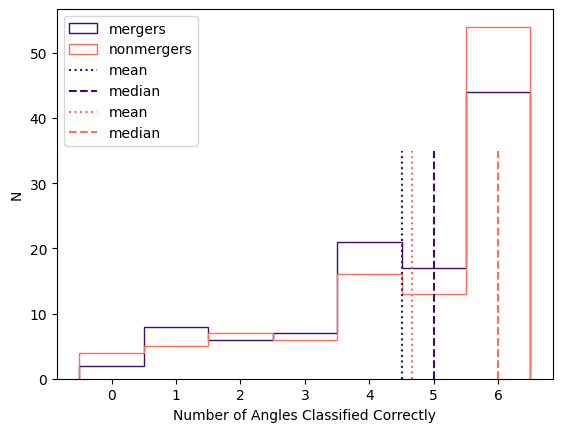

In [64]:
plt.figure()
plt.hist(num_angle_correct[inds], bins = np.arange(-0.5,7,1), histtype='step', color = cmap(0.2), label = 'mergers')
plt.hist(num_angle_correct[~inds], bins = np.arange(-0.5,7,1), histtype='step', color = cmap(0.7), label = 'nonmergers')
plt.vlines(x = np.mean(num_angle_correct[inds]), ymin = 0, ymax = 35, color = cmap(0.2), label = 'mean', linestyle = ':')
plt.vlines(x = np.median(num_angle_correct[inds]), ymin = 0, ymax = 35, color = cmap(0.2), label = 'median', linestyle = '--')
plt.vlines(x = np.mean(num_angle_correct[~inds]), ymin = 0, ymax = 35, color = cmap(0.7), label = 'mean', linestyle = ':')
plt.vlines(x = np.median(num_angle_correct[~inds]), ymin = 0, ymax = 35, color = cmap(0.7), label = 'median', linestyle = '--')
plt.xlabel('Number of Angles Classified Correctly')
plt.ylabel('N')
plt.legend()
plt.show()

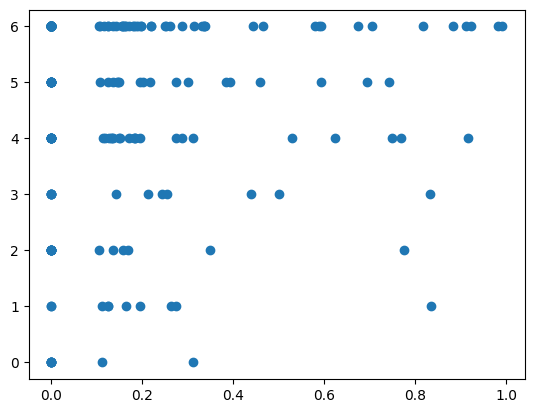

In [65]:
plt.figure()
plt.scatter(mass_ratio, num_angle_correct)
plt.show()

In [66]:
angles_df_q = pd.DataFrame([])
angles_df_q['Number of Angles Correctly Classified'] = num_angle_correct[inds]
angles_df_q['Mass Ratio'] = mass_ratio[inds]

In [67]:
angles_q_ax2_ylabels = []
for c in range(7):
    count = len(angles_df_q[angles_df_q['Number of Angles Correctly Classified'] == c])
    angles_q_ax2_ylabels.append(str(count))

print(angles_q_ax2_ylabels)

['2', '8', '6', '7', '21', '17', '44']


(0.05, 1.05)

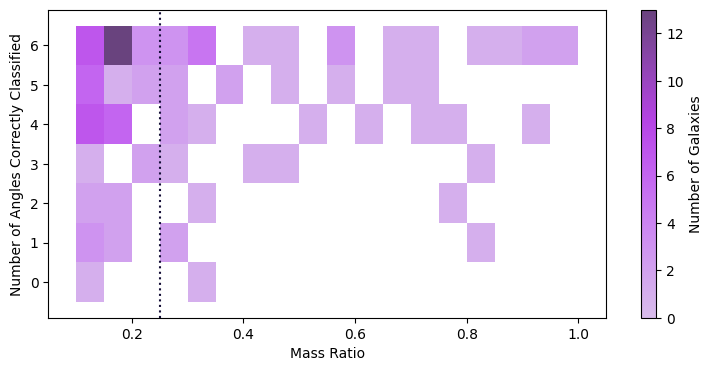

In [68]:
fig, ax = plt.subplots(figsize = (9,4))
#ax.axvspan(xmin = 0.25, xmax= 1, ymin = -1, ymax = 7, alpha = 0.5, color = 'grey')
sns.histplot(data=angles_df_q, x="Mass Ratio", y = "Number of Angles Correctly Classified", 
             bins = (np.arange(0,1.1,0.05), np.arange(-0.5,7,1)), color=cmap(0.3),
             cbar=True, cbar_kws={'label': 'Number of Galaxies'}) #)
ax.axvline(x = 0.25, ymin = 0, ymax = 1, color = cmap(0.1), linestyle=':')

plt.ylim(-.9, 6.9)
plt.xlim(0.05,1.05)

/tmp/ipykernel_3346022/2464553385.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = angles_df_q, x="Mass Ratio", y = "Number of Angles Correctly Classified",


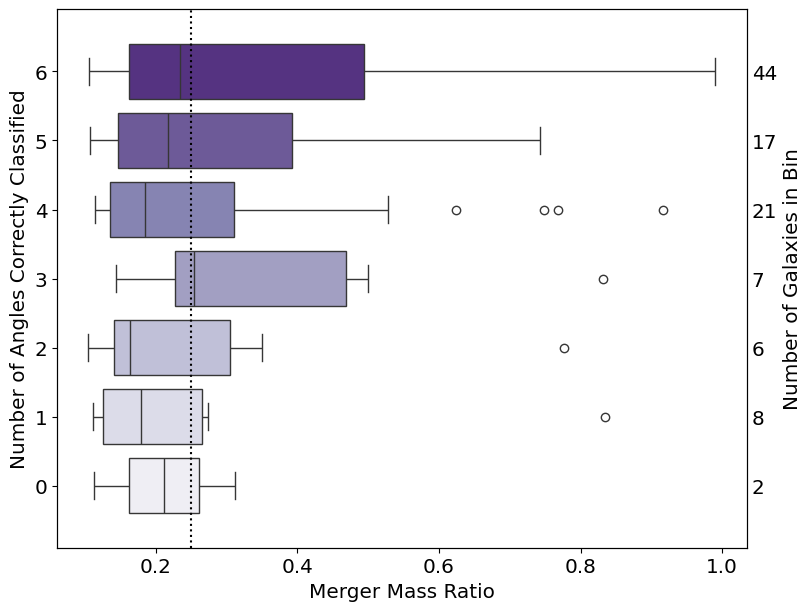

In [69]:
fig, ax = plt.subplots(figsize = (8,6), constrained_layout= True)
sns.boxplot(data = angles_df_q, x="Mass Ratio", y = "Number of Angles Correctly Classified", 
            dodge = False, orient = 'h', palette='Purples').set(xlabel = 'Merger Mass Ratio')
ax.axvline(x = 0.25, ymin = 0, ymax = 1, color = 'black', linestyle = ':')
ax.set_xlabel('Merger Mass Ratio', fontsize = 'x-large')
ax.set_ylabel("Number of Angles Correctly Classified", fontsize = 'x-large')
ax.tick_params(labelsize = 'x-large')
plt.ylim(-.9, 6.9)
ax2 = ax.twinx()
ax2.set_ylim(ax.get_ylim())
ax2.set_yticks(ax.get_yticks())
ax2.tick_params(axis=u'both', which=u'both',length=0, labelsize = 'x-large')
ax2.set_yticklabels(angles_q_ax2_ylabels)
ax2.set_ylabel('Number of Galaxies in Bin', fontsize = 'x-large')
plt.savefig('AnglesCorrect_MassRatio' + CNNName + '.png', dpi = 300, bbox_inches="tight")
plt.show()


7
[0.05300208 0.16000422 0.11291599 0.21854477 0.20750554 0.19490887
 0.14783001]
[0.06371059 0.0617623  0.06369979 0.24799064 0.27728168 0.22148359
 0.18798999]
[0.05300208 0.2089397  0.11291599 0.21854477 0.20750554 0.19490887
 0.14783001]
[0.         0.04893548 0.         0.         0.         0.
 0.        ]


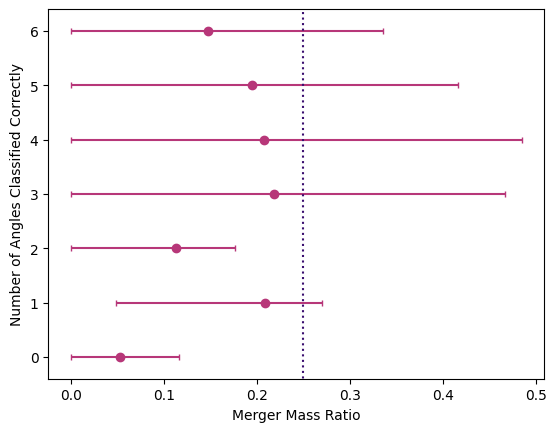

In [70]:

stat, binedges, binnum = binned_statistic(x = num_angle_correct, values = mass_ratio, bins = bins, statistic= 'mean')
print(len(stat))
percentlow, binedges, binnum = binned_statistic(x = num_angle_correct, values = mass_ratio, bins = bins, statistic= lambda mass_ratio:np.percentile(mass_ratio, 16))
percenthigh, binedges, binnum = binned_statistic(x = num_angle_correct, values = mass_ratio, bins = bins, statistic= lambda mass_ratio:np.percentile(mass_ratio, 86))
errlow = stat - percentlow
print(errlow)
errhigh = percenthigh - stat
print(errhigh)
print(stat)
print(percentlow)
plt.figure()
# plt.scatter(num_angle_correct, mass_ratio, s = 10)
# plt.scatter(np.arange(0,7), stat)
plt.errorbar(stat, np.arange(0,7), xerr = (errlow, errhigh), fmt = 'o', color = cmap(0.5), capsize = 2)
plt.vlines(x = 0.25, ymin = -0.5, ymax =7, color = cmap(0.2), linestyle= ':')
plt.ylim(-0.4, 6.4)
plt.xlabel('Merger Mass Ratio')
plt.ylabel('Number of Angles Classified Correctly')
plt.show()

# What is the average number of angles correct based on mass?

In [71]:
num_angle_correct = []
num_angle_correct_nm = []
mass = []
for s in shids:
    s = s.astype(str)
    angle1 = s+'_1'
    angle2 = s+'_2'
    angle3 = s+'_3'
    angle4 = s+'_4'
    angle5 = s+'_5'
    angle6 = s+'_6'
    a1 = ClassificationInfo[ClassificationInfo['Image Name'] == angle1]
    a2 = ClassificationInfo[ClassificationInfo['Image Name'] == angle2]
    a3 = ClassificationInfo[ClassificationInfo['Image Name'] == angle3]
    a4 = ClassificationInfo[ClassificationInfo['Image Name'] == angle4]
    a5 = ClassificationInfo[ClassificationInfo['Image Name'] == angle5]
    a6 = ClassificationInfo[ClassificationInfo['Image Name'] == angle6]
    count = 0
    for a in [a1, a2, a3, a4, a5, a6]:
        if a['Correct?'].values[0] == 'yes':
            count+=1
    num_angle_correct.append(count)
    mass.append(a['Stellar Mass'].values[0])
num_angle_correct = np.array(num_angle_correct) 
mass = np.array(mass)     
print(np.mean(np.array(num_angle_correct)))    
print(np.median(np.array(num_angle_correct)))    
print(np.std(np.array(num_angle_correct)))    

4.652380952380953
6.0
1.7669233544751084


In [72]:
inds = np.where(mass_ratio != 0.0)[0]

In [73]:
angles_df_sm_mergers = pd.DataFrame([])
angles_df_sm_mergers['Number of Angles Correctly Classified'] = num_angle_correct[inds]
angles_df_sm_mergers['Stellar Mass'] = mass[inds]

angles_df_sm_nonmergers = pd.DataFrame([])
angles_df_sm_nonmergers['Number of Angles Correctly Classified'] = num_angle_correct[~inds]
angles_df_sm_nonmergers['Stellar Mass'] = mass[~inds]

In [74]:
angles_sm_mergers_ax2_ylabels = []
for c in range(7):
    count = len(angles_df_sm_mergers[angles_df_sm_mergers['Number of Angles Correctly Classified'] == c])
    angles_sm_mergers_ax2_ylabels.append(str(count))

print(angles_sm_mergers_ax2_ylabels)

angles_sm_nonmergers_ax2_ylabels = []
for c in range(7):
    count = len(angles_df_sm_nonmergers[angles_df_sm_nonmergers['Number of Angles Correctly Classified'] == c])
    angles_sm_nonmergers_ax2_ylabels.append(str(count))

print(angles_sm_nonmergers_ax2_ylabels)

['2', '8', '6', '7', '21', '17', '44']
['4', '5', '7', '6', '16', '13', '54']


/tmp/ipykernel_3346022/2830414211.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = angles_df_sm_mergers, x="Stellar Mass", y = "Number of Angles Correctly Classified",


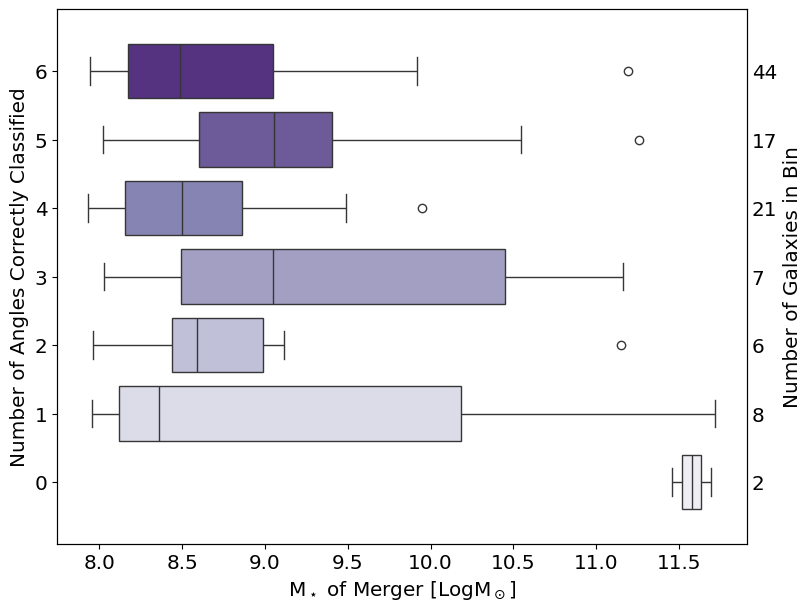

/tmp/ipykernel_3346022/2830414211.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = angles_df_sm_nonmergers, x="Stellar Mass", y = "Number of Angles Correctly Classified",


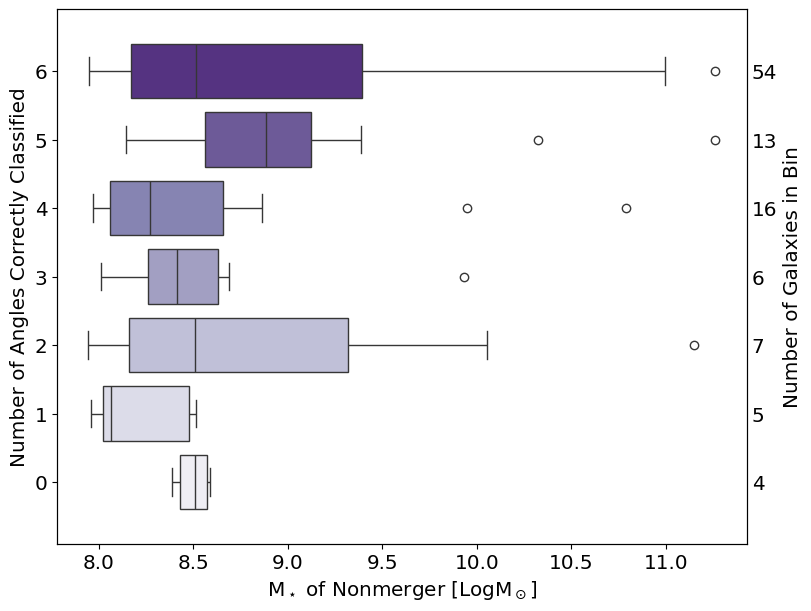

In [75]:
fig, ax = plt.subplots(figsize = (8,6), constrained_layout=True)
sns.boxplot(data = angles_df_sm_mergers, x="Stellar Mass", y = "Number of Angles Correctly Classified", 
            dodge = False, orient = 'h', palette='Purples').set(xlabel = r"M$_\star$ of Merger [LogM$_\odot$]")
plt.ylim(-.9, 6.9)
ax.set_xlabel(r"M$_\star$ of Merger [LogM$_\odot$]", fontsize = 'x-large')
ax.set_ylabel("Number of Angles Correctly Classified",fontsize = 'x-large')
ax.tick_params(labelsize = 'x-large')
ax2 = ax.twinx()
ax2.set_ylim(ax.get_ylim())
ax2.set_yticks(ax.get_yticks())
ax2.tick_params(axis=u'both', which=u'both',length=0, labelsize = 'x-large')
ax2.set_yticklabels(angles_sm_mergers_ax2_ylabels, fontsize = 'x-large')
ax2.set_ylabel('Number of Galaxies in Bin', fontsize = 'x-large')
#plt.tight_layout()
plt.savefig('AnglesCorrect_StellarMass_Merger' + CNNName + '.png', dpi = 300, bbox_inches="tight")
plt.show()


fig, ax = plt.subplots(figsize = (8,6), constrained_layout=True)
sns.boxplot(data = angles_df_sm_nonmergers, x="Stellar Mass", y = "Number of Angles Correctly Classified", 
            dodge = False, orient = 'h', palette='Purples').set(xlabel = r"M$_\star$ of Nonmerger [LogM$_\odot$]",)
plt.ylim(-.9, 6.9)
ax.set_xlabel(r"M$_\star$ of Nonmerger [LogM$_\odot$]", fontsize = 'x-large')
ax.set_ylabel("Number of Angles Correctly Classified",fontsize = 'x-large')
ax.tick_params(labelsize = 'x-large')
ax2 = ax.twinx()
ax2.set_ylim(ax.get_ylim())
ax2.set_yticks(ax.get_yticks())
ax2.tick_params(axis=u'both', which=u'both',length=0, labelsize = 'x-large')
ax2.set_yticklabels(angles_sm_nonmergers_ax2_ylabels, fontsize = 'x-large')
ax2.set_ylabel('Number of Galaxies in Bin', fontsize = 'x-large')
#plt.tight_layout()
plt.savefig('AnglesCorrect_StellarMass_Nonmerger' + CNNName + '.png', dpi = 300, bbox_inches="tight")
plt.show()


# What is the average number of angles correct based on SFR?

In [76]:
num_angle_correct = []
num_angle_correct_nm = []
sfr = []
for s in shids:
    s = s.astype(str)
    angle1 = s+'_1'
    angle2 = s+'_2'
    angle3 = s+'_3'
    angle4 = s+'_4'
    angle5 = s+'_5'
    angle6 = s+'_6'
    a1 = ClassificationInfo[ClassificationInfo['Image Name'] == angle1]
    a2 = ClassificationInfo[ClassificationInfo['Image Name'] == angle2]
    a3 = ClassificationInfo[ClassificationInfo['Image Name'] == angle3]
    a4 = ClassificationInfo[ClassificationInfo['Image Name'] == angle4]
    a5 = ClassificationInfo[ClassificationInfo['Image Name'] == angle5]
    a6 = ClassificationInfo[ClassificationInfo['Image Name'] == angle6]
    count = 0
    for a in [a1, a2, a3, a4, a5, a6]:
        if a['Correct?'].values[0] == 'yes':
            count+=1
    num_angle_correct.append(count)
    sfr.append(a['SFR'].values[0])
num_angle_correct = np.array(num_angle_correct) 
sfr = np.array(sfr) 
sfr = np.log10(sfr)    
print(np.mean(np.array(num_angle_correct)))    
print(np.median(np.array(num_angle_correct)))    
print(np.std(np.array(num_angle_correct)))    

4.652380952380953
6.0
1.7669233544751084


In [77]:
inds = np.where(mass_ratio != 0.0)[0]

In [78]:
angles_df_sfr_mergers = pd.DataFrame([])
angles_df_sfr_mergers['Number of Angles Correctly Classified'] = num_angle_correct[inds]
angles_df_sfr_mergers['SFR'] = sfr[inds]

angles_df_sfr_nonmergers = pd.DataFrame([])
angles_df_sfr_nonmergers['Number of Angles Correctly Classified'] = num_angle_correct[~inds]
angles_df_sfr_nonmergers['SFR'] = sfr[~inds]

In [79]:
angles_sfr_mergers_ax2_ylabels = []
for c in range(7):
    count = len(angles_df_sfr_mergers[angles_df_sfr_mergers['Number of Angles Correctly Classified'] == c])
    angles_sfr_mergers_ax2_ylabels.append(str(count))

print(angles_sfr_mergers_ax2_ylabels)

angles_sfr_nonmergers_ax2_ylabels = []
for c in range(7):
    count = len(angles_df_sfr_nonmergers[angles_df_sfr_nonmergers['Number of Angles Correctly Classified'] == c])
    angles_sfr_nonmergers_ax2_ylabels.append(str(count))

print(angles_sfr_nonmergers_ax2_ylabels)

['2', '8', '6', '7', '21', '17', '44']
['4', '5', '7', '6', '16', '13', '54']


/tmp/ipykernel_3346022/567280130.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = angles_df_sfr_mergers, x="SFR", y = "Number of Angles Correctly Classified",


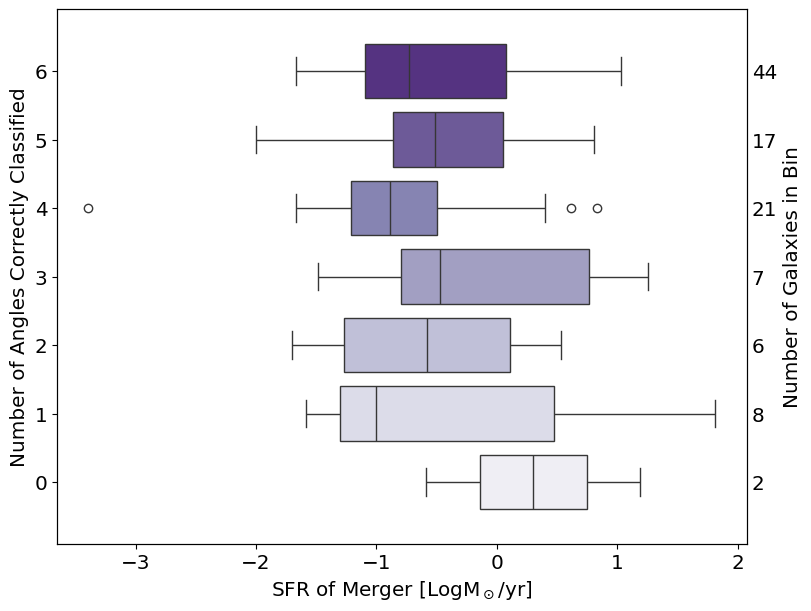

/tmp/ipykernel_3346022/567280130.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = angles_df_sfr_nonmergers, x="SFR", y = "Number of Angles Correctly Classified",


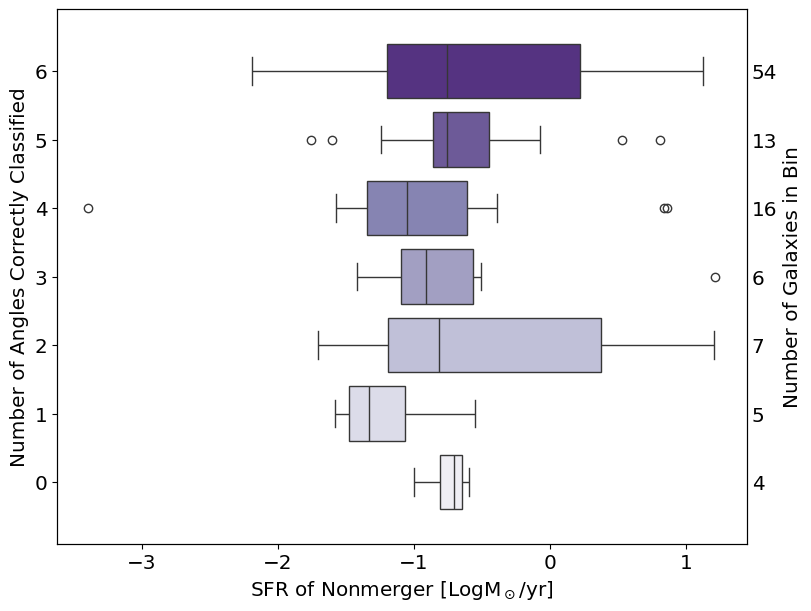

In [80]:
fig, ax = plt.subplots(figsize = (8,6), constrained_layout=True)
sns.boxplot(data = angles_df_sfr_mergers, x="SFR", y = "Number of Angles Correctly Classified", 
            dodge = False, orient = 'h', palette='Purples').set(xlabel = r"SFR of Merger [LogM$_\odot$/yr]")
plt.ylim(-.9, 6.9)
ax.set_xlabel(r"SFR of Merger [LogM$_\odot$/yr]", fontsize = 'x-large')
ax.set_ylabel("Number of Angles Correctly Classified",fontsize = 'x-large')
ax.tick_params(labelsize = 'x-large')
ax2 = ax.twinx()
ax2.set_ylim(ax.get_ylim())
ax2.set_yticks(ax.get_yticks())
ax2.tick_params(axis=u'both', which=u'both',length=0, labelsize = 'x-large')
ax2.set_yticklabels(angles_sfr_mergers_ax2_ylabels, fontsize = 'x-large')
ax2.set_ylabel('Number of Galaxies in Bin', fontsize = 'x-large')
#plt.tight_layout()
plt.savefig('AnglesCorrect_SFR_Merger' + CNNName + '.png', dpi = 300, bbox_inches="tight")
plt.show()


fig, ax = plt.subplots(figsize = (8,6), constrained_layout=True)
sns.boxplot(data = angles_df_sfr_nonmergers, x="SFR", y = "Number of Angles Correctly Classified", 
            dodge = False, orient = 'h', palette='Purples').set(xlabel = r"SFR of Nonmerger [LogM$_\odot$/yr]",)
plt.ylim(-.9, 6.9)
ax.set_xlabel(r"SFR of Nonmerger [LogM$_\odot$/yr]", fontsize = 'x-large')
ax.set_ylabel("Number of Angles Correctly Classified",fontsize = 'x-large')
ax.tick_params(labelsize = 'x-large')
ax2 = ax.twinx()
ax2.set_ylim(ax.get_ylim())
ax2.set_yticks(ax.get_yticks())
ax2.tick_params(axis=u'both', which=u'both',length=0, labelsize = 'x-large')
ax2.set_yticklabels(angles_sfr_nonmergers_ax2_ylabels, fontsize = 'x-large')
ax2.set_ylabel('Number of Galaxies in Bin', fontsize = 'x-large')
#plt.tight_layout()
plt.savefig('AnglesCorrect_SFR_Nonmerger' + CNNName + '.png', dpi = 300, bbox_inches="tight")
plt.show()


now go see what their grad cams look like

# SNS jointplot

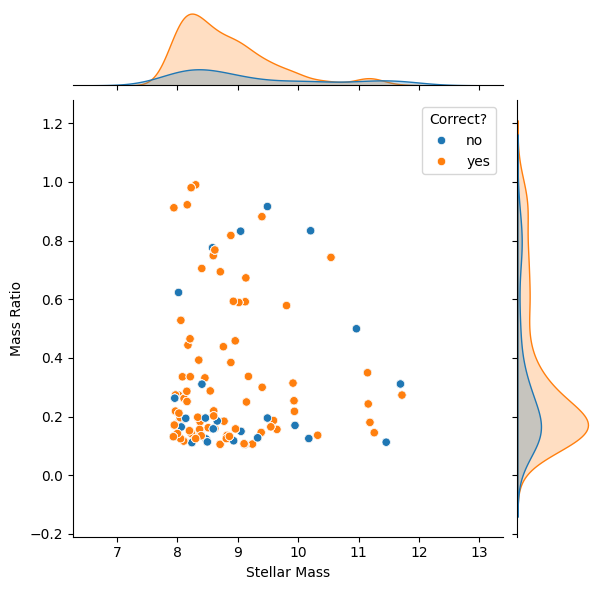

In [81]:
sns.jointplot(data=ClassificationInfo[ClassificationInfo['Mass Ratio']!= 0.0], x="Stellar Mass", y="Mass Ratio", hue="Correct?")


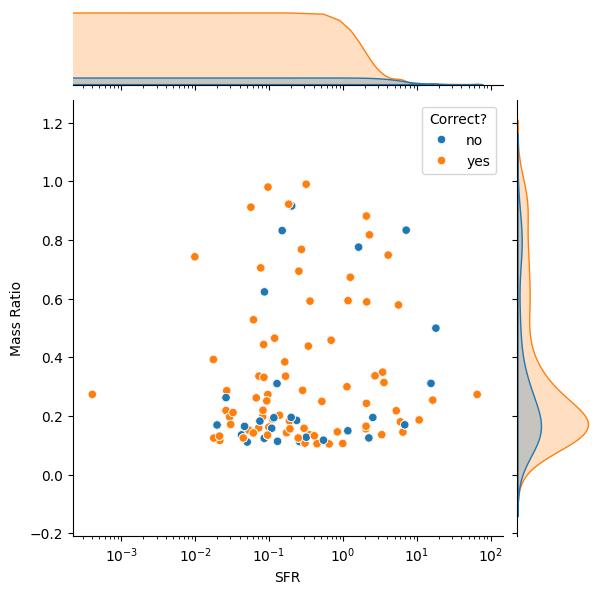

In [82]:
sns.jointplot(data=ClassificationInfo[ClassificationInfo['Mass Ratio']!= 0.0], x="SFR", y="Mass Ratio", hue="Correct?").ax_joint.set_xscale('log')


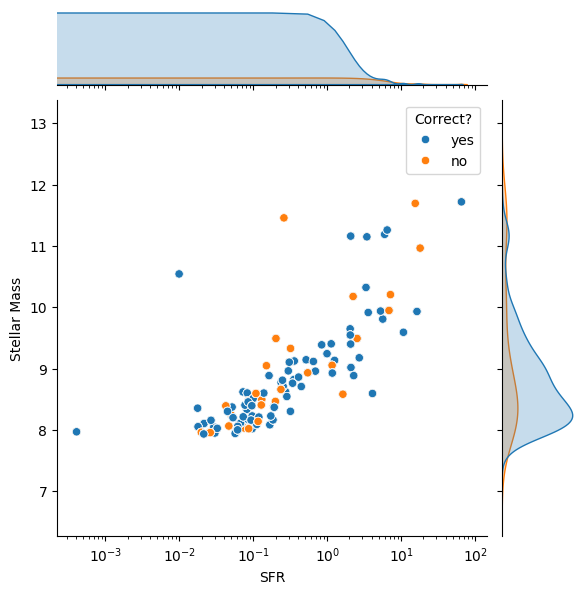

In [83]:
sns.jointplot(data=ClassificationInfo[ClassificationInfo['Mass Ratio']!= 0.0], x="SFR", y="Stellar Mass", hue="Correct?", hue_order = ['yes', 'no']).ax_joint.set_xscale('log')


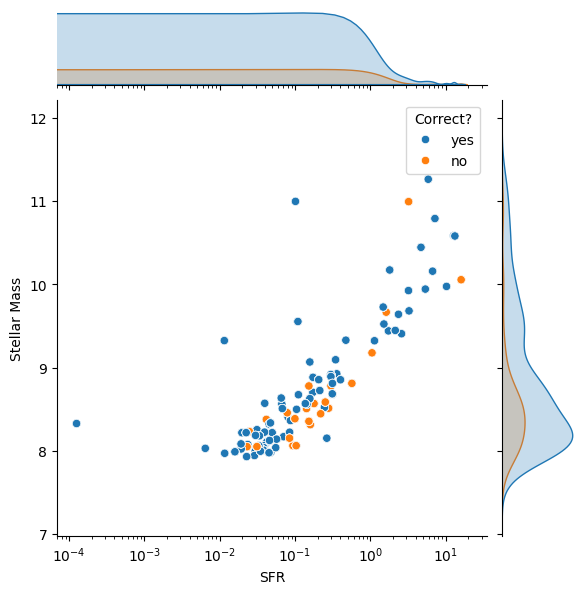

In [84]:
sns.jointplot(data=ClassificationInfo[ClassificationInfo['Mass Ratio']== 0.0], x="SFR", y="Stellar Mass", hue="Correct?", hue_order = ['yes', 'no']).ax_joint.set_xscale('log')


# SFR with right or wrong

In [85]:
cmap = matplotlib.colormaps['magma']

mergers_color = cmap(0.2)
nonmergers_color = cmap(0.7)
nonmergers_color_wrong = cmap(0.65)
nonmergers_line = cmap(0.55)

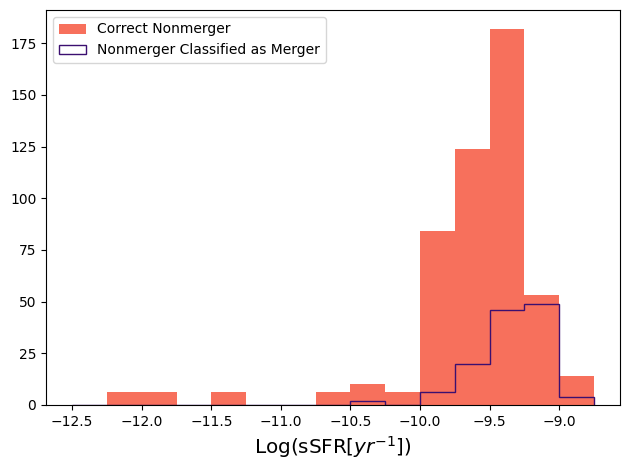

In [86]:
nonmerger_sfr = ClassificationInfo[ClassificationInfo['Mass Ratio']== 0.0]['SFR']
nonmerger_mass = ClassificationInfo[ClassificationInfo['Mass Ratio']== 0.0]['Stellar Mass']
nonmerger_mass = 10**nonmerger_mass
nonmerger_ssfr = nonmerger_sfr/nonmerger_mass

nonmerger_sfr_correct = nonmerger_sfr[ClassificationInfo['Correct?'] == 'yes']
nonmerger_sfr_incorrect = nonmerger_sfr[ClassificationInfo['Correct?'] == 'no']

nonmerger_ssfr_correct = nonmerger_ssfr[ClassificationInfo['Correct?'] == 'yes']
nonmerger_ssfr_incorrect = nonmerger_ssfr[ClassificationInfo['Correct?'] == 'no']

plt.figure()
plt.hist(np.log10(nonmerger_ssfr_correct), color = nonmergers_color, bins = np.arange(-12.5, -8.5, 0.25), label = 'Correct Nonmerger')
plt.hist(np.log10(nonmerger_ssfr_incorrect), color = mergers_color, histtype = 'step', bins = np.arange(-12.5, -8.5, 0.25), label = 'Nonmerger Classified as Merger')
plt.xlabel(r'Log(sSFR[$yr^{-1}$])', fontsize = 'x-large')
plt.legend()
plt.tight_layout()

plt.show()
#ClassificationInfo[ClassificationInfo['Mass Ratio']!= 0.0]

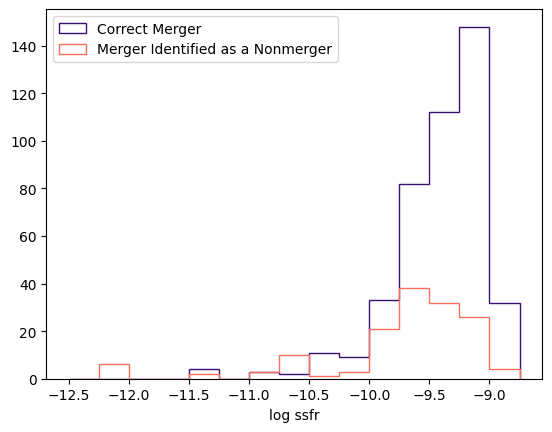

In [87]:
merger_sfr = ClassificationInfo[ClassificationInfo['Mass Ratio']!= 0.0]['SFR']
merger_mass = ClassificationInfo[ClassificationInfo['Mass Ratio']!= 0.0]['Stellar Mass']
merger_mass = 10**merger_mass
merger_ssfr = merger_sfr/merger_mass

merger_sfr_correct = merger_sfr[ClassificationInfo['Correct?'] == 'yes']
merger_sfr_incorrect = merger_sfr[ClassificationInfo['Correct?'] == 'no']

merger_ssfr_correct = merger_ssfr[ClassificationInfo['Correct?'] == 'yes']
merger_ssfr_incorrect = merger_ssfr[ClassificationInfo['Correct?'] == 'no']

plt.figure()
plt.hist(np.log10(merger_ssfr_correct), color = mergers_color, histtype = 'step', bins = np.arange(-12.5, -8.5, 0.25), label = 'Correct Merger')
plt.hist(np.log10(merger_ssfr_incorrect), color = nonmergers_color, histtype = 'step', bins = np.arange(-12.5, -8.5, 0.25), label = 'Merger Identified as a Nonmerger')
plt.xlabel('log ssfr')
plt.legend()
plt.show()
#ClassificationInfo[ClassificationInfo['Mass Ratio']!= 0.0]

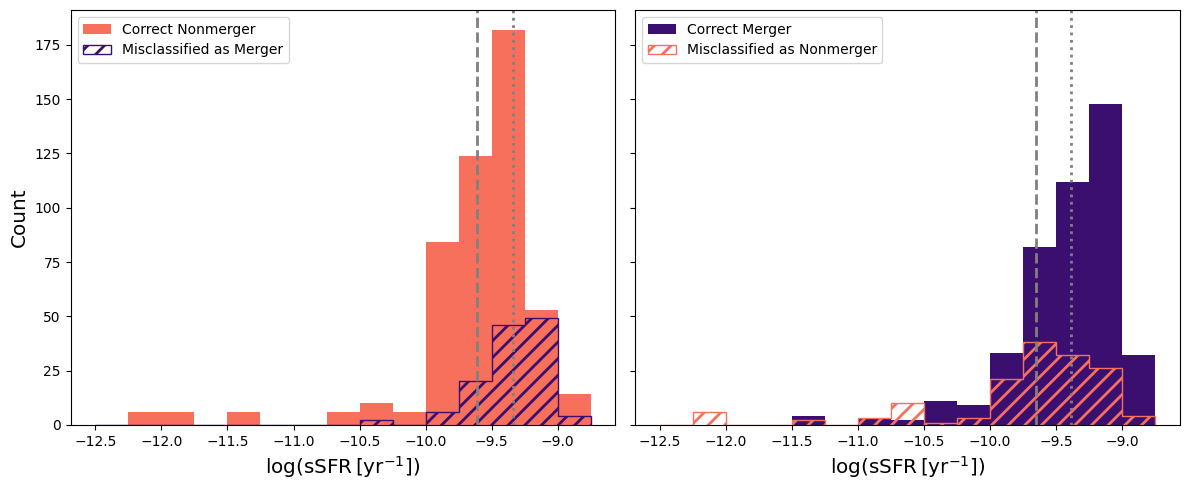

In [88]:
plt.rcParams['hatch.linewidth'] = 2.0 
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)  # 2 columns, 1 row

# Panel 1: Nonmergers
axes[0].hist(np.log10(nonmerger_ssfr_correct), color=nonmergers_color, 
             bins=np.arange(-12.5, -8.5, 0.25), label='Correct Nonmerger')
axes[0].hist(np.log10(nonmerger_ssfr_incorrect), color=mergers_color,
             histtype='step', hatch='//', bins=np.arange(-12.5, -8.5, 0.25), label='Misclassified as Merger')
axes[0].axvline(np.mean(np.log10(nonmerger_ssfr_correct)), color = 'grey', linestyle = '--', linewidth = 2)
axes[0].axvline(np.mean(np.log10(nonmerger_ssfr_incorrect)), color = 'grey', linestyle = ':', linewidth = 2)
axes[0].set_xlabel(r'$\log(\mathrm{sSFR}\,[\mathrm{yr}^{-1}])$', fontsize='x-large')
axes[0].set_ylabel('Count', fontsize='x-large')
axes[0].legend(fontsize='medium', loc = 'upper left')

# Panel 2: Mergers
axes[1].hist(np.log10(merger_ssfr_correct), color=mergers_color,  
             bins=np.arange(-12.5, -8.5, 0.25), label='Correct Merger')
axes[1].hist(np.log10(merger_ssfr_incorrect), color=nonmergers_color, histtype = 'step', hatch = '//',
             bins=np.arange(-12.5, -8.5, 0.25), label='Misclassified as Nonmerger')
axes[1].axvline(np.mean(np.log10(merger_ssfr_incorrect)), color = 'grey', linestyle = '--', linewidth =2)
axes[1].axvline(np.mean(np.log10(merger_ssfr_correct)), color = 'grey', linestyle = ':', linewidth = 2)

axes[1].set_xlabel(r'$\log(\mathrm{sSFR}\,[\mathrm{yr}^{-1}])$', fontsize='x-large')
axes[1].legend(fontsize='medium', loc = 'upper left')


# Adjust layout
plt.tight_layout()
plt.savefig('ssfr_rightandwrong.png', dpi=300, bbox_inches='tight')
plt.show()

# Calibration Error

## Brier Score

In [89]:
brier = brier_score_loss(y_true = all_labels, y_proba = all_probabilities[:,0], pos_label = 0)
print(brier)

0.16174072643287818


## Expected Calibration Error

In [90]:
#confidences = probabiliies (I think we use all_probabilities here)
print(all_probabilities)
print(np.min(all_probabilities))
print(type(all_labels[0]))

[[0.51295346 0.48704657]
 [0.66123927 0.3387608 ]
 [0.23089048 0.7691095 ]
 ...
 [0.703115   0.296885  ]
 [0.8044796  0.19552039]
 [0.00809236 0.9919077 ]]
3.7326907e-05
<class 'numpy.int64'>


In [91]:
#https://towardsdatascience.com/expected-calibration-error-ece-a-step-by-step-visual-explanation-with-python-code-c3e9aa12937d/
def ECE(samples, labels, numbins = 10):
    # uniform binning approach with M number of bins
    bin_boundaries = np.linspace(0, 1, numbins + 1)
    bin_lowers = bin_boundaries[:-1]
    bin_uppers = bin_boundaries[1:]
    
    # get max probability per sample i
    confidences = np.max(samples, axis=1)
    # get predictions from confidences (positional in this case)
    predicted_label = np.argmax(samples, axis=1)
    
    # get a boolean list of correct/false predictions
    accuracies = predicted_label==labels

    ece = np.zeros(1)
    bin_accs = []
    bin_confs = []
    bin_nums = [] 
    for bin_lower, bin_upper in zip(bin_lowers, bin_uppers):
        # determine if sample is in bin m (between bin lower &amp; upper)
        in_bin = np.logical_and(confidences > bin_lower.item(), confidences <= bin_upper.item())
        nums= in_bin.sum()
        # can calculate the empirical probability of a sample falling into bin m: (|Bm|/n)
        prob_in_bin = in_bin.mean()

        if prob_in_bin.item() > 0:
            bin_nums.append(nums)
            # get the accuracy of bin m: acc(Bm)
            accuracy_in_bin = accuracies[in_bin].mean()
            bin_accs.append(accuracy_in_bin)
            # get the average confidence of bin m: conf(Bm)
            avg_confidence_in_bin = confidences[in_bin].mean()
            bin_confs.append(avg_confidence_in_bin)
            # calculate |acc(Bm) - conf(Bm)| * (|Bm|/n) for bin m and add to the total ECE
            ece += np.abs(avg_confidence_in_bin - accuracy_in_bin) * prob_in_bin
        else:
            bin_accs.append(np.nan)
            bin_confs.append(np.nan)
            bin_nums.append(np.nan)
    return ece, np.array(bin_accs), np.array(bin_confs), bin_nums

In [92]:
ece, accs, confs, nums = ECE(all_probabilities, all_labels)
gap = confs - accs

In [93]:
print(nums)

[nan, nan, nan, nan, nan, 157, 148, 197, 212, 546]


In [94]:
print(accs)

bin_boundaries = np.linspace(0, 1, 10 + 1)
bin_lowers = bin_boundaries[:-1]
bin_uppers = bin_boundaries[1:]

bin_centers = ((bin_uppers - bin_lowers) /2) + bin_boundaries[:-1]
print(bin_centers)

[       nan        nan        nan        nan        nan 0.56050955
 0.61486486 0.73604061 0.78301887 0.89194139]
[0.05 0.15 0.25 0.35 0.45 0.55 0.65 0.75 0.85 0.95]


In [95]:
print(gap)

[        nan         nan         nan         nan         nan -0.01199823
  0.03662326  0.01602934  0.06994333  0.07297335]


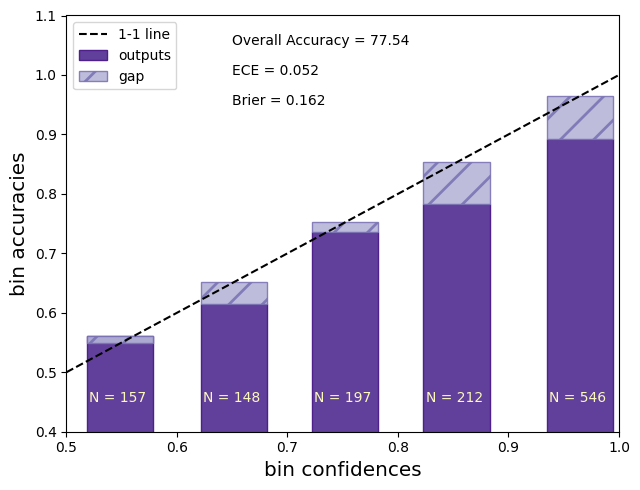

In [96]:
purples = matplotlib.colormaps['Purples']
fig, ax = plt.subplots(figsize=(width*2, height*2))
plt.bar(confs, accs, width = 0.06, edgecolor = purples(0.9), color = purples(0.8), label = 'outputs')
plt.bar(confs, gap, bottom = accs, width = 0.06, hatch = '/', edgecolor = purples(0.65), color = purples(0.4), label = 'gap', alpha = 0.9)
ax.axline((0, 0), slope=1, color='k', linestyle='--', label='1-1 line')
plt.xlabel('bin confidences', fontsize = 'x-large')
plt.ylabel('bin accuracies', fontsize = 'x-large')
#plt.title(CNNName)
plt.ylim(0.4,1.1)
plt.xlim(0.5,1)
ax.annotate(text = 'Overall Accuracy = ' + str(np.round(test_accuracy,3)), xy = (0.65, 1.05))
ax.annotate(text = 'ECE = ' + str(np.round(ece[0],3)), xy = (0.65, 1))
ax.annotate(text = 'Brier = ' + str(np.round(brier,3)), xy = (0.65, 0.95))
for i in range(len(nums)):
    ax.annotate(text = 'N = ' +str(nums[i]), xy = (confs[i]-0.028, 0.45), color = cmap(0.99))
plt.legend()
plt.tight_layout()
plt.savefig('ECE_' + CNNName + '.png', dpi = 300, bbox_inches="tight")
plt.show()

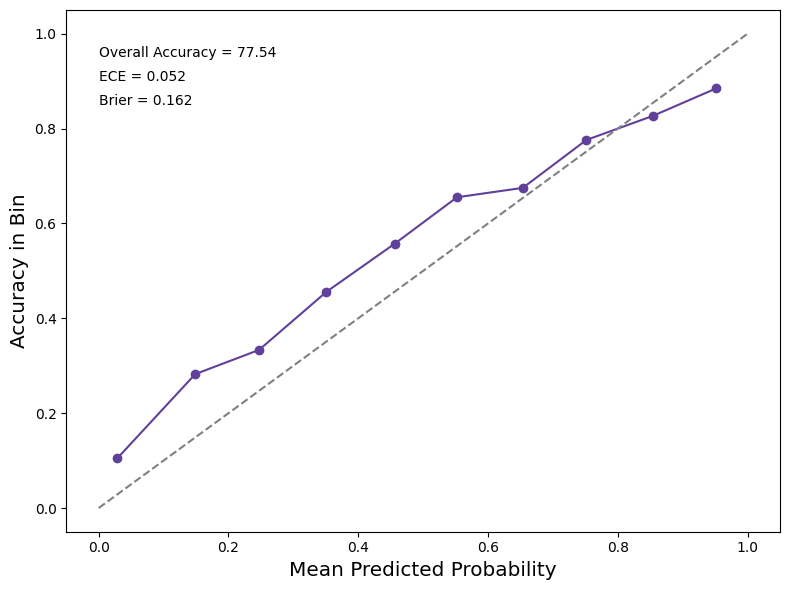

In [97]:
# Compute calibration curve
prob_true, prob_pred = calibration_curve(all_labels, all_probabilities[:, 0], n_bins=10, strategy='uniform', pos_label = 0)
#print(prob_true)
# Plot
plt.figure(figsize=(8,6))
plt.plot(prob_pred, prob_true, marker='o', color = purples(0.8))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('Mean Predicted Probability', fontsize = 'x-large')
plt.ylabel('Accuracy in Bin', fontsize = 'x-large')
plt.annotate(text = 'Overall Accuracy = ' + str(np.round(test_accuracy,3)), xy = (0, 0.95))
plt.annotate(text = 'ECE = ' + str(np.round(ece[0],3)), xy = (0, 0.9))
plt.annotate(text = 'Brier = ' + str(np.round(brier,3)), xy = (0, 0.85))
plt.tight_layout()
plt.savefig('CalibrationCurve.png', dpi = 300)
plt.show()

## Brier Score

# Sort Grad-CAMs

In [98]:
# to find patterns we want to look at specific grad cams at a time
# gradcam_filenames = glob.glob('/n/home09/aschechter/code/BinaryCNNTesting/PytorchCNNs/gradcam/Adam_Cyclic/test/bothlabels/*.png')
#gradcam_filenames[0][110:-4] this gets just the image name!

In [99]:
# gradcam_filenames[0]

In [100]:
# major = ClassificationInfo[ClassificationInfo['Ratio Name'] == 'major']
# minor = ClassificationInfo[ClassificationInfo['Ratio Name'] == 'minor']
# non = ClassificationInfo[ClassificationInfo['Ratio Name'] == 'non']
# allmergers = ClassificationInfo[ClassificationInfo['Mass Ratio'] != 0.0]
# lowmass = ClassificationInfo[ClassificationInfo['Stellar Mass'] <= 9.5]
# highmass = ClassificationInfo[ClassificationInfo['Stellar Mass'] > 9.5]
# firstprogs = ClassificationInfo[ClassificationInfo['Type'] == 'first_progenitor']
# nextprogs = ClassificationInfo[ClassificationInfo['Type'] == 'next_progenitor']
# merger = ClassificationInfo[ClassificationInfo['Type'] == 'Merger']
# descs = ClassificationInfo[ClassificationInfo['Type'] == 'Descendant']

# earlymergers = pd.concat((firstprogs, nextprogs))
# latemergers = pd.concat((merger, descs))

In [101]:
# gradcam_sourcepath = '/n/home09/aschechter/code/BinaryCNNTesting/PytorchCNNs/gradcam/Adam_Cyclic/test/bothlabels/gradcam_test_image_'

# gradcam_minorpath = '/n/home09/aschechter/code/BinaryCNNTesting/PytorchCNNs/gradcam/Adam_Cyclic/test/bothlabels/gradcam_sorted_by_types/minor/gradcam_test_image_'
# for minmerg in minor['Image Name']:
#     #print(minmerg)
#     shutil.copy(gradcam_sourcepath + minmerg + '.png', gradcam_minorpath + minmerg + '.png')

# gradcam_majorpath = '/n/home09/aschechter/code/BinaryCNNTesting/PytorchCNNs/gradcam/Adam_Cyclic/test/bothlabels/gradcam_sorted_by_types/major/gradcam_test_image_'
# for majmerg in major['Image Name']:
#     #print(minmerg)
#     shutil.copy(gradcam_sourcepath + majmerg + '.png', gradcam_majorpath + majmerg + '.png')

# gradcam_lowpath = '/n/home09/aschechter/code/BinaryCNNTesting/PytorchCNNs/gradcam/Adam_Cyclic/test/bothlabels/gradcam_sorted_by_types/lowmass/gradcam_test_image_'
# for low in lowmass['Image Name']:
#     #print(low)
#     shutil.copy(gradcam_sourcepath + low + '.png', gradcam_lowpath + low + '.png')

# gradcam_highpath = '/n/home09/aschechter/code/BinaryCNNTesting/PytorchCNNs/gradcam/Adam_Cyclic/test/bothlabels/gradcam_sorted_by_types/highmass/gradcam_test_image_'
# for high in highmass['Image Name']:
#     #print(minmerg)
#     shutil.copy(gradcam_sourcepath + high + '.png', gradcam_highpath + high + '.png')

# gradcam_earlypath = '/n/home09/aschechter/code/BinaryCNNTesting/PytorchCNNs/gradcam/Adam_Cyclic/test/bothlabels/gradcam_sorted_by_types/earlymergers/gradcam_test_image_'
# for early in earlymergers['Image Name']:
#     #print(early)
#     shutil.copy(gradcam_sourcepath + early + '.png', gradcam_earlypath + early + '.png')

# gradcam_latepath = '/n/home09/aschechter/code/BinaryCNNTesting/PytorchCNNs/gradcam/Adam_Cyclic/test/bothlabels/gradcam_sorted_by_types/latemergers/gradcam_test_image_'
# for late in latemergers['Image Name']:
#     #print(late)
#     shutil.copy(gradcam_sourcepath + late + '.png', gradcam_latepath + late + '.png')
    
# gradcam_allpath = '/n/home09/aschechter/code/BinaryCNNTesting/PytorchCNNs/gradcam/Adam_Cyclic/test/bothlabels/gradcam_sorted_by_types/allmergers/gradcam_test_image_'
# for allmerg in allmergers['Image Name']:
#     #print(allmerg)
#     shutil.copy(gradcam_sourcepath + allmerg + '.png', gradcam_allpath + allmerg + '.png')

# gradcam_nonpath = '/n/home09/aschechter/code/BinaryCNNTesting/PytorchCNNs/gradcam/Adam_Cyclic/test/bothlabels/nonmergers/gradcam_test_image_'
# for nonmerg in non['Image Name']:
#     #print(nonmerg)
#     shutil.copy(gradcam_sourcepath + nonmerg + '.png', gradcam_nonpath + nonmerg + '.png')

In [102]:
# high_major = major[major['Stellar Mass'] > 9.5]
# high_minor = minor[minor['Stellar Mass'] > 9.5]
# low_major = major[major['Stellar Mass'] <= 9.5]
# low_minor = minor[minor['Stellar Mass'] <= 9.5]

# high_merger = pd.concat((high_major, high_minor))
# low_merger = pd.concat((low_major, low_minor))

In [103]:
# gradcam_lowminorpath = '/n/home09/aschechter/code/BinaryCNNTesting/PytorchCNNs/gradcam/Adam_Cyclic/test/bothlabels/lowmass+minor/gradcam_test_image_'
# for lowmin in low_minor['Image Name']:
#     #print(minmerg)
#     shutil.copy(gradcam_sourcepath + lowmin + '.png', gradcam_lowminorpath + lowmin + '.png')

# gradcam_lowmajorpath = '/n/home09/aschechter/code/BinaryCNNTesting/PytorchCNNs/gradcam/Adam_Cyclic/test/bothlabels/lowmass+major/gradcam_test_image_'
# for lowmaj in low_major['Image Name']:
#     #print(majmerg)
#     shutil.copy(gradcam_sourcepath + lowmaj + '.png', gradcam_lowmajorpath + lowmaj + '.png')

# gradcam_highminorpath = '/n/home09/aschechter/code/BinaryCNNTesting/PytorchCNNs/gradcam/Adam_Cyclic/test/bothlabels/highmass+minor/gradcam_test_image_'
# for highmin in high_minor['Image Name']:
#     #print(minmerg)
#     shutil.copy(gradcam_sourcepath + highmin + '.png', gradcam_highminorpath + highmin + '.png')

# gradcam_highmajorpath = '/n/home09/aschechter/code/BinaryCNNTesting/PytorchCNNs/gradcam/Adam_Cyclic/test/bothlabels/highmass+major/gradcam_test_image_'
# for highmaj in high_major['Image Name']:
#     #print(majmerg)
#     shutil.copy(gradcam_sourcepath + highmaj + '.png', gradcam_highmajorpath + highmaj + '.png')

# gradcam_lowmergerpath = '/n/home09/aschechter/code/BinaryCNNTesting/PytorchCNNs/gradcam/Adam_Cyclic/test/bothlabels/lowmass+merger/gradcam_test_image_'
# for lowmerg in low_merger['Image Name']:
#     #print(mergmerg)
#     shutil.copy(gradcam_sourcepath + lowmerg + '.png', gradcam_lowmergerpath + lowmerg + '.png')

# gradcam_highmergerpath = '/n/home09/aschechter/code/BinaryCNNTesting/PytorchCNNs/gradcam/Adam_Cyclic/test/bothlabels/highmass+merger/gradcam_test_image_'
# for highmerg in high_merger['Image Name']:
#     #print(mergmerg)
#     shutil.copy(gradcam_sourcepath + highmerg + '.png', gradcam_highmergerpath + highmerg + '.png')


# Feature Activation

In [104]:
# # Choose a convolutional layer to visualize
# activation = {}
# def get_activation(name):
#     def hook(model, input, output):
#         activation[name] = output.detach()
#     return hook

# # Hook into layer — for ResNet18 you might try:
# model.layer1[0].conv1.register_forward_hook(get_activation('conv1'))

# # Prepare your input

# image_tensor = test_dataloader.dataset[0][0].unsqueeze(0).to(device).float()  # shape: [1, C, H, W]

# # Forward pass
# output = model(image_tensor)

# # Get activations
# act = activation['conv1'].squeeze()  # shape: [num_features, H, W]

# # Plot first 8 activation maps
# fig, axes = plt.subplots(1, 8, figsize=(20, 5))
# for idx in range(8):
#     axes[idx].imshow(act[idx].cpu(), cmap='viridis')
#     axes[idx].axis('off')
#     axes[idx].set_title(f'Feature {idx}')
# plt.tight_layout()
# plt.show()

# Isomap

In [105]:
cmap = matplotlib.colormaps['magma']

mergers_color = cmap(0.2)
nonmergers_color = cmap(0.7)
colors = [mergers_color, nonmergers_color]  # List of colors
cmap_name = "my_cmap"  # Name for your colormap
cmap_binary = LinearSegmentedColormap.from_list(cmap_name, colors)
      


In [106]:
print(np.shape(all_extracted_features))
print(np.shape(all_logits))

(1260, 512)
(1260, 2)


In [107]:
iso = Isomap(n_neighbors=25, n_components=2)
from sklearn.preprocessing import StandardScaler
#X_scaled = StandardScaler().fit_transform(all_extracted_features)
#isomap_results = iso.fit_transform(all_probabilities) #can also use output after softmax but this can contain more data
isomap_results = iso.fit_transform(all_extracted_features) #used to be all_logits
#isomap_results = iso.fit_transform(X_scaled)
print(f"Shape of Isomap results: {isomap_results.shape}")


Shape of Isomap results: (1260, 2)


In [108]:
print(all_names[0])
print(all_labels_for_isomap_plot)

209243_2
[0 1 0 ... 0 0 1]


In [109]:
# custom labels
wordlabels = []

for l in range(len(all_labels_for_isomap_plot)):
    if all_labels_for_isomap_plot[l] == 0:
        wordlabels.append('merger')
    else:
        wordlabels.append('nonmerger')
        
print(wordlabels)

['merger', 'nonmerger', 'merger', 'merger', 'merger', 'merger', 'merger', 'nonmerger', 'nonmerger', 'nonmerger', 'merger', 'nonmerger', 'merger', 'merger', 'merger', 'nonmerger', 'nonmerger', 'nonmerger', 'nonmerger', 'merger', 'nonmerger', 'merger', 'nonmerger', 'nonmerger', 'merger', 'merger', 'nonmerger', 'nonmerger', 'merger', 'nonmerger', 'nonmerger', 'merger', 'merger', 'merger', 'merger', 'merger', 'nonmerger', 'merger', 'nonmerger', 'nonmerger', 'merger', 'nonmerger', 'nonmerger', 'nonmerger', 'nonmerger', 'merger', 'nonmerger', 'nonmerger', 'merger', 'nonmerger', 'merger', 'nonmerger', 'merger', 'nonmerger', 'merger', 'nonmerger', 'nonmerger', 'merger', 'nonmerger', 'nonmerger', 'merger', 'nonmerger', 'nonmerger', 'nonmerger', 'merger', 'nonmerger', 'nonmerger', 'nonmerger', 'nonmerger', 'nonmerger', 'merger', 'nonmerger', 'nonmerger', 'nonmerger', 'nonmerger', 'merger', 'nonmerger', 'nonmerger', 'nonmerger', 'nonmerger', 'nonmerger', 'merger', 'merger', 'merger', 'merger', 'n

In [110]:
np.array(all_labels) == np.array(all_labels_for_isomap_plot)

array([ True,  True,  True, ...,  True,  True,  True])

/tmp/ipykernel_3346022/75171715.py:6: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  scatter = plt.scatter(isomap_results[merger_mask, 0], isomap_results[merger_mask, 1],
/tmp/ipykernel_3346022/75171715.py:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  scatter = plt.scatter(isomap_results[nonmerger_mask, 0], isomap_results[nonmerger_mask, 1],
/n/home09/aschechter/.local/lib/python3.10/site-packages/matplotlib/collections.py

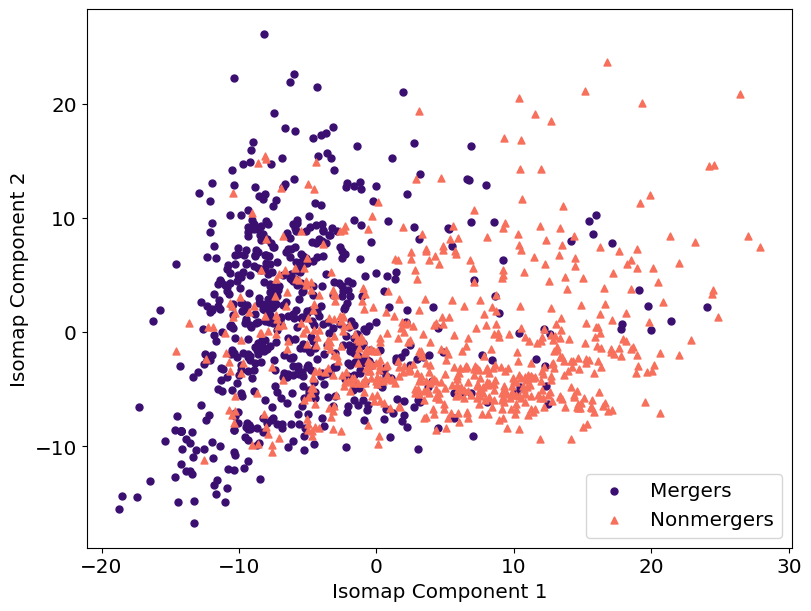

In [111]:
# 3. Visualize the Isomap embedding (optional, but helpful)
merger_mask = (all_labels_for_isomap_plot == 0)
nonmerger_mask = (all_labels_for_isomap_plot == 1)

plt.figure(figsize=(8,6), constrained_layout = True)
scatter = plt.scatter(isomap_results[merger_mask, 0], isomap_results[merger_mask, 1], 
                      c=cmap(0.2),s = 25, label = 'Mergers')

scatter = plt.scatter(isomap_results[nonmerger_mask, 0], isomap_results[nonmerger_mask, 1], 
                      c=cmap(0.7),s = 25, marker = '^', label = 'Nonmergers')
#plt.title('Isomap projection of the test set outputs')
plt.xlabel('Isomap Component 1',fontsize = 'x-large')
plt.ylabel('Isomap Component 2', fontsize = 'x-large')
# Create a legend if you have a manageable number of classes
plt.xticks(fontsize='x-large')
plt.yticks(fontsize='x-large')
legend_elements = scatter.legend_elements()
plt.legend(fontsize = 'x-large')
plt.savefig('isomap_classes.png', dpi = 300)
plt.show()

In [112]:
# custom pred labels
pred_wordlabels = []

for l in range(len(all_preds)):
    if all_preds[l] == 0:
        pred_wordlabels.append('merger')
    else:
        pred_wordlabels.append('nonmerger')
        
print(pred_wordlabels)

['merger', 'merger', 'nonmerger', 'merger', 'nonmerger', 'merger', 'merger', 'nonmerger', 'nonmerger', 'nonmerger', 'merger', 'nonmerger', 'merger', 'merger', 'merger', 'nonmerger', 'nonmerger', 'nonmerger', 'nonmerger', 'merger', 'nonmerger', 'nonmerger', 'nonmerger', 'nonmerger', 'merger', 'merger', 'nonmerger', 'merger', 'merger', 'merger', 'merger', 'merger', 'nonmerger', 'merger', 'nonmerger', 'merger', 'nonmerger', 'merger', 'merger', 'nonmerger', 'merger', 'nonmerger', 'nonmerger', 'merger', 'nonmerger', 'nonmerger', 'merger', 'merger', 'merger', 'nonmerger', 'merger', 'merger', 'merger', 'nonmerger', 'merger', 'merger', 'nonmerger', 'merger', 'nonmerger', 'nonmerger', 'merger', 'merger', 'nonmerger', 'nonmerger', 'merger', 'nonmerger', 'nonmerger', 'nonmerger', 'nonmerger', 'merger', 'merger', 'merger', 'nonmerger', 'nonmerger', 'merger', 'merger', 'nonmerger', 'merger', 'nonmerger', 'nonmerger', 'merger', 'merger', 'nonmerger', 'merger', 'nonmerger', 'merger', 'nonmerger', 'me

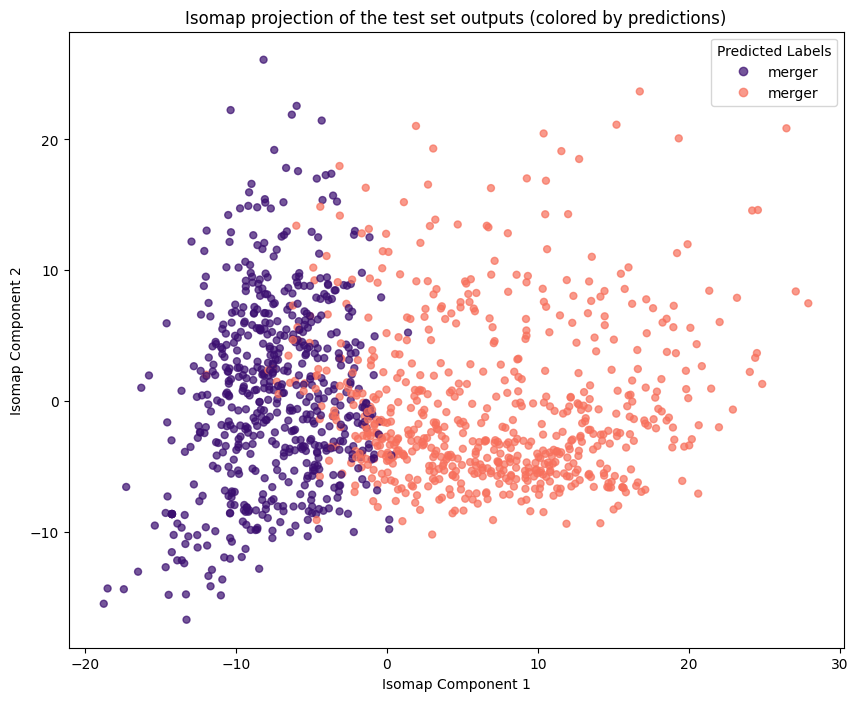

In [113]:
#You can also color by predictions:
plt.figure(figsize=(10, 8))
scatter_preds = plt.scatter(isomap_results[:, 0], isomap_results[:, 1], c=all_preds, cmap=cmap_binary, alpha=0.7, s = 25)
plt.title('Isomap projection of the test set outputs (colored by predictions)')
plt.xlabel('Isomap Component 1')
plt.ylabel('Isomap Component 2')
try:
    legend_preds_elements = scatter_preds.legend_elements()
    if legend_preds_elements and legend_preds_elements[0]:
       plt.legend(handles=legend_preds_elements[0], labels=pred_wordlabels, title="Predicted Labels")
    else:
       plt.colorbar(scatter_preds, label='Predicted Labels (Encoded)')
except Exception as e:
    print(f"Could not create detailed prediction legend: {e}")
    plt.colorbar(scatter_preds, label='Predicted Labels (Encoded)')
plt.show()


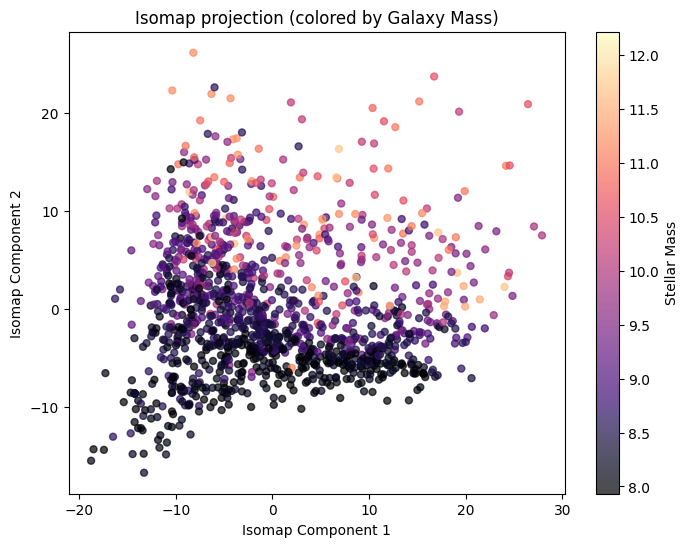

In [114]:
masses_in_order = []

for name in all_names:
    mass = ClassificationInfo.loc[ClassificationInfo['Image Name'] == str(name), 'Stellar Mass'].iloc[0]
    masses_in_order.append(mass)
masses_in_order = np.array(masses_in_order)
norm_mass = Normalize(vmin=np.min(masses_in_order), vmax=np.max(masses_in_order)+0.5)
plt.figure(figsize=(8,6)) # Adjusted for colorbar
# Use a colormap suitable for continuous data, e.g., 'viridis', 'plasma', 'coolwarm', 'magma'
scatter = plt.scatter(
    isomap_results[:, 0],
    isomap_results[:, 1],
    c=masses_in_order, # Color by mass
    cmap='magma',       # Choose a colormap
    alpha=0.7,
    s=25,
    norm = norm_mass
)

plt.title('Isomap projection (colored by Galaxy Mass)')
plt.xlabel('Isomap Component 1')
plt.ylabel('Isomap Component 2')

# Add a colorbar to show the mass scale
cbar = plt.colorbar(scatter)
cbar.set_label('Stellar Mass') # Update label with units

plt.show()

[0.18434177, 0.0, 0.13636528, 0.99038935, 0.11758917, 0.33605665, 0.106311925, 0.0, 0.0, 0.0, 0.28760183, 0.0, 0.21792197, 0.16511726, 0.1250964, 0.0, 0.0, 0.0, 0.0, 0.24987264, 0.0, 0.34962659999999995, 0.0, 0.0, 0.384596, 0.27381107, 0.0, 0.0, 0.7429124112953295, 0.0, 0.0, 0.9806341427585611, 0.111217, 0.8818440999999999, 0.19418514, 0.13579404, 0.0, 0.18434177, 0.0, 0.0, 0.169407, 0.0, 0.0, 0.0, 0.0, 0.8322622811327057, 0.0, 0.0, 0.8177481, 0.0, 0.19640149, 0.0, 0.15954891, 0.0, 0.8818440999999999, 0.0, 0.0, 0.28638574, 0.0, 0.0, 0.10546916, 0.0, 0.0, 0.0, 0.99038935, 0.0, 0.0, 0.0, 0.0, 0.0, 0.19418514, 0.0, 0.0, 0.0, 0.0, 0.19799843, 0.0, 0.0, 0.0, 0.0, 0.0, 0.18663451, 0.7487745, 0.99038935, 0.16474542, 0.0, 0.0, 0.5786283949502175, 0.0, 0.0, 0.0, 0.0, 0.16226006, 0.5917554383656235, 0.0, 0.0, 0.0, 0.0, 0.0, 0.16511726, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.18663451, 0.3106262, 0.39276493, 0.0, 0.8322622811327057, 0.39276493, 0.20243274, 0.0, 0.19418514, 0.19640149, 0.0, 0.28

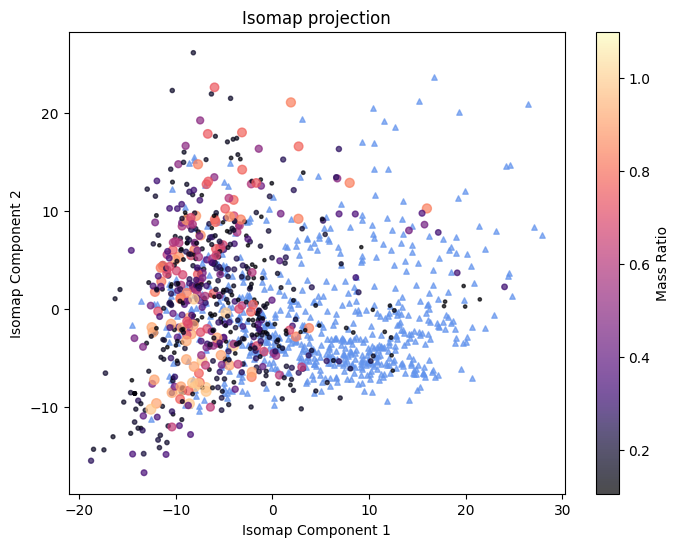

In [115]:
ratios_in_order = []

for name in all_names:
    ratio = ClassificationInfo.loc[ClassificationInfo['Image Name'] == str(name), 'Mass Ratio'].iloc[0]
    ratios_in_order.append(ratio)
    
print(ratios_in_order)
ratios_in_order = np.array(ratios_in_order)
zero_ratio_indices = np.where(ratios_in_order == 0.0)[0]
non_zero_ratio_indices = np.where(ratios_in_order != 0.0)[0]

plt.figure(figsize=(8,6)) # Adjusted for colorbar
# Use a colormap suitable for continuous data, e.g., 'viridis', 'plasma', 'coolwarm', 'magma'

scatter_zero = plt.scatter(
isomap_results[:, 0][zero_ratio_indices],
isomap_results[:, 1][zero_ratio_indices],
color='cornflowerblue',       # Choose a distinct color
alpha=0.7,
s=15,              # Maybe make them slightly larger
marker='^',
label='Nonmergers' # Add a label for the legend
)

scatter = plt.scatter(
    isomap_results[:, 0][non_zero_ratio_indices],
    isomap_results[:, 1][non_zero_ratio_indices],
    c=ratios_in_order[non_zero_ratio_indices], # Color by mass
    cmap='magma',       # Choose a colormap
    alpha=0.7,
    s=np.array(ratios_in_order[non_zero_ratio_indices])*50,
    vmax = 1.1,
    label = 'Mergers'
)
plt.title('Isomap projection')
plt.xlabel('Isomap Component 1')
plt.ylabel('Isomap Component 2')

# Add a colorbar to show the mass scale
cbar = plt.colorbar(scatter)
cbar.set_label('Mass Ratio') # Update label with units

plt.show()

['Descendant', '0.0', 'first_progenitor', 'Merger', 'Descendant', 'first_progenitor', 'Descendant', '0.0', '0.0', '0.0', 'first_progenitor', '0.0', 'Descendant', 'Merger', 'Descendant', '0.0', '0.0', '0.0', '0.0', 'Descendant', '0.0', 'Descendant', '0.0', '0.0', 'first_progenitor', 'next_progenitor', '0.0', '0.0', 'first_progenitor', '0.0', '0.0', 'first_progenitor', 'Merger', 'Descendant', 'first_progenitor', 'first_progenitor', '0.0', 'Descendant', '0.0', '0.0', 'first_progenitor', '0.0', '0.0', '0.0', '0.0', 'Descendant', '0.0', '0.0', 'next_progenitor', '0.0', 'first_progenitor', '0.0', 'first_progenitor', '0.0', 'Descendant', '0.0', '0.0', 'Descendant', '0.0', '0.0', 'Descendant', '0.0', '0.0', '0.0', 'Merger', '0.0', '0.0', '0.0', '0.0', '0.0', 'first_progenitor', '0.0', '0.0', '0.0', '0.0', 'next_progenitor', '0.0', '0.0', '0.0', '0.0', '0.0', 'next_progenitor', 'first_progenitor', 'Merger', 'Descendant', '0.0', '0.0', 'Descendant', '0.0', '0.0', '0.0', '0.0', 'first_progenitor'

/tmp/ipykernel_3346022/1204844930.py:15: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  scatter = plt.scatter(


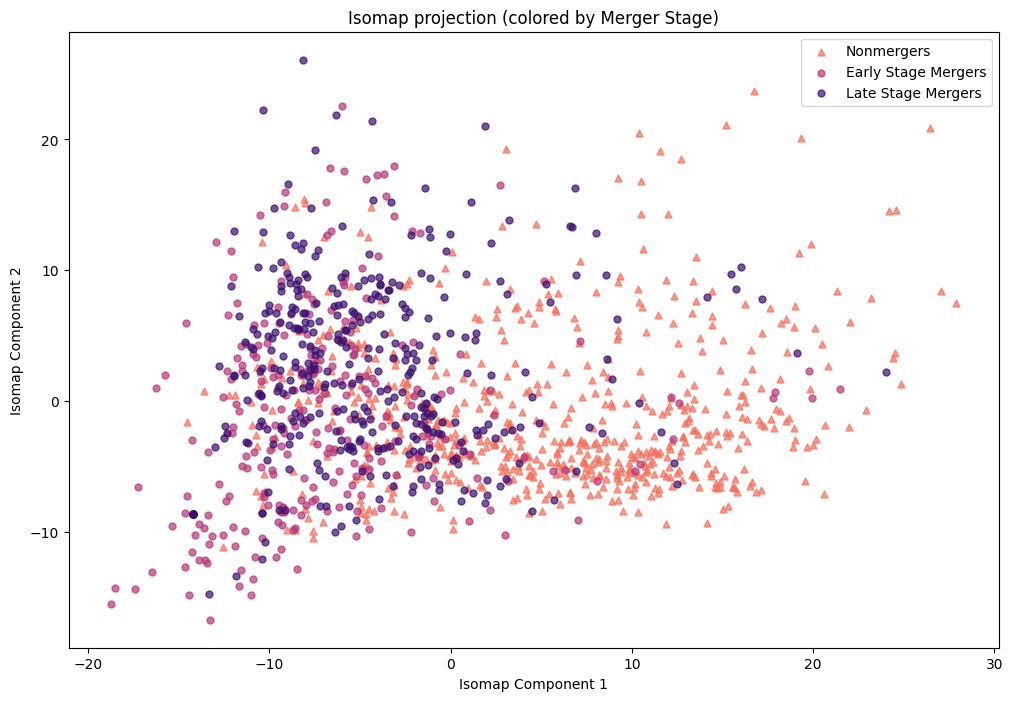

In [116]:
types_in_order = []

for name in all_names:
    typeofmerg = ClassificationInfo.loc[ClassificationInfo['Image Name'] == str(name), 'Type'].iloc[0]
    types_in_order.append(typeofmerg)
    
print(types_in_order)
types_in_order = np.array(types_in_order)
nostage = np.where(types_in_order == '0.0')[0]
earlystage = np.where((types_in_order == 'first_progenitor') | (types_in_order == 'next_progenitor'))[0]
latestage = np.where((types_in_order == 'Merger') | (types_in_order == 'Descendant'))[0]

plt.figure(figsize=(12, 8)) # Adjusted for colorbar
# Use a colormap suitable for continuous data, e.g., 'viridis', 'plasma', 'coolwarm', 'magma'
scatter = plt.scatter(
    isomap_results[:, 0][nostage],
    isomap_results[:, 1][nostage],
    c=nonmergers_color, 
    #cmap='magma',       # Choose a colormap
    alpha=0.7,
    s=25,
    marker = '^',
    label = 'Nonmergers'
)

scatter_zero = plt.scatter(
    isomap_results[:, 0][earlystage],
    isomap_results[:, 1][earlystage],
    color=cmap(0.5),       # Choose a distinct color
    alpha=0.7,
    s=25,              # Maybe make them slightly larger
    marker='o',
    label='Early Stage Mergers' # Add a label for the legend
)

scatter_zero = plt.scatter(
    isomap_results[:, 0][latestage],
    isomap_results[:, 1][latestage],
    color=cmap(0.2),       # Choose a distinct color
    alpha=0.7,
    s=25,              # Maybe make them slightly larger
    marker='o',
    label='Late Stage Mergers' # Add a label for the legend
)

plt.title('Isomap projection (colored by Merger Stage)')
plt.xlabel('Isomap Component 1')
plt.ylabel('Isomap Component 2')

# # Add a colorbar to show the mass scale
# cbar = plt.colorbar(scatter)
# cbar.set_label('Mass Ratio)') # Update label with units
plt.legend()
plt.show()

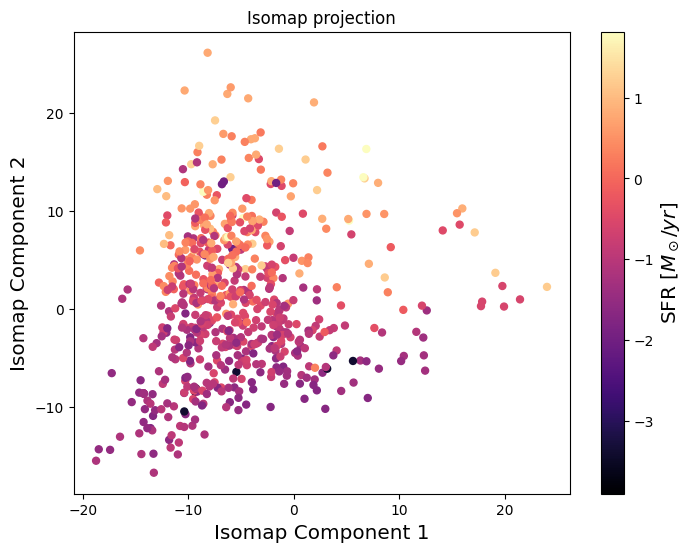

In [117]:
sfrs_in_order = []

for name in all_names:
    sfr = ClassificationInfo.loc[ClassificationInfo['Image Name'] == str(name), 'SFR'].iloc[0]
    sfrs_in_order.append(sfr)
    
log_sfr_array = np.log10(np.array(sfrs_in_order))
norm_sfr = Normalize(vmin=np.min(log_sfr_array), vmax=np.max(log_sfr_array))
plt.figure(figsize=(8,6)) # Adjusted for colorbar
# Use a colormap suitable for continuous data, e.g., 'viridis', 'plasma', 'coolwarm', 'magma'
scatter = plt.scatter(
    isomap_results[:, 0][non_zero_ratio_indices],
    isomap_results[:, 1][non_zero_ratio_indices],
    c=log_sfr_array[non_zero_ratio_indices], # Color by mass
    cmap='magma',       # Choose a colormap
    #alpha=0.7,
    #s=np.array(sfrs_in_order)[non_zero_ratio_indices]*3,
    s = 25,
    label = 'Mergers',
    norm = norm_sfr
    #,vmax = 75,
    
)

# scatter = plt.scatter(
#     isomap_results[:, 0][zero_ratio_indices],
#     isomap_results[:, 1][zero_ratio_indices],
#     c=np.array(sfrs_in_order)[zero_ratio_indices], # Color by mass
#     cmap='magma',       # Choose a colormap
#     alpha=0.7,
#     marker = '^',
#     s=np.array(sfrs_in_order)[zero_ratio_indices]*3,
#     label = 'Nonmergers'
#     ,vmax = 75,
    
# )

plt.title('Isomap projection')
plt.xlabel('Isomap Component 1', fontsize = 'x-large')
plt.ylabel('Isomap Component 2', fontsize = 'x-large')

# Add a colorbar to show the mass scale
cbar = plt.colorbar(scatter)
cbar.set_label(r'SFR [$M_\odot/yr$]', fontsize = 'x-large') # Update label with units

plt.show()

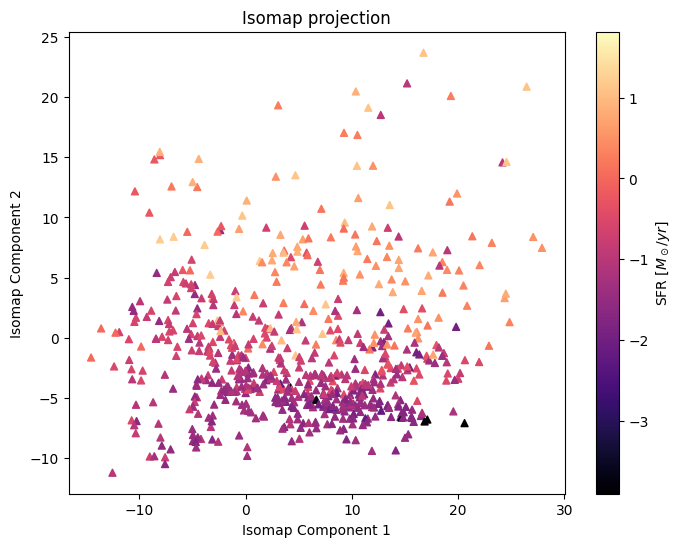

In [118]:
sfrs_in_order = []

for name in all_names:
    sfr = ClassificationInfo.loc[ClassificationInfo['Image Name'] == str(name), 'SFR'].iloc[0]
    sfrs_in_order.append(sfr)
plt.figure(figsize=(8,6)) # Adjusted for colorbar
# Use a colormap suitable for continuous data, e.g., 'viridis', 'plasma', 'coolwarm', 'magma'
# scatter = plt.scatter(
#     isomap_results[:, 0][non_zero_ratio_indices],
#     isomap_results[:, 1][non_zero_ratio_indices],
#     c=np.array(sfrs_in_order)[non_zero_ratio_indices], # Color by mass
#     cmap='magma',       # Choose a colormap
#     alpha=0.7,
#     s=np.array(sfrs_in_order)[non_zero_ratio_indices]*3,
#     label = 'Mergers'
#     ,vmax = 75,
    
# )

scatter = plt.scatter(
    isomap_results[:, 0][zero_ratio_indices],
    isomap_results[:, 1][zero_ratio_indices],
    c=log_sfr_array[zero_ratio_indices], # Color by mass
    cmap='magma',       # Choose a colormap
    #alpha=0.7,
    marker = '^',
    s=25,#np.array(sfrs_in_order)[zero_ratio_indices]*30,
    label = 'Nonmergers',
    norm = norm_sfr
    #,vmax = 75,
    
)

plt.title('Isomap projection')
plt.xlabel('Isomap Component 1')
plt.ylabel('Isomap Component 2')

# Add a colorbar to show the mass scale
cbar = plt.colorbar(scatter)
cbar.set_label(r'SFR [$M_\odot/yr$]') # Update label with units

plt.show()

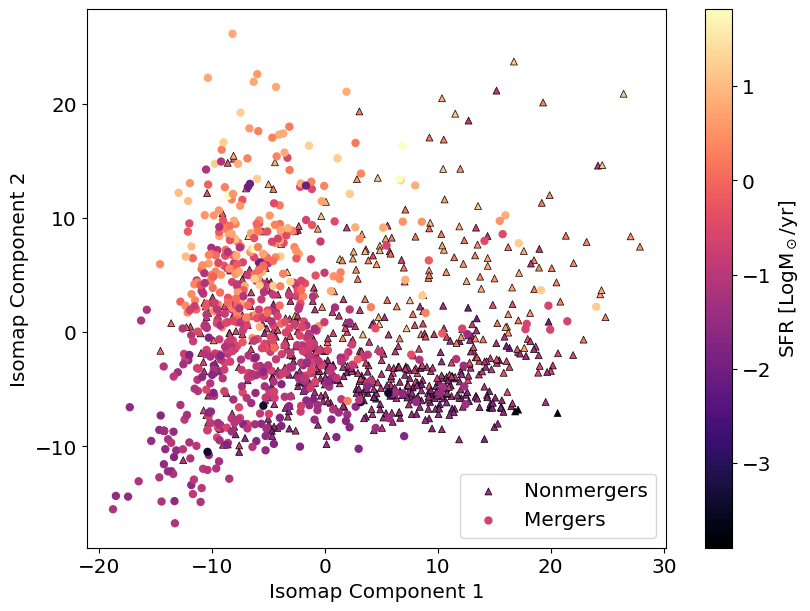

In [119]:
sfrs_in_order = []

for name in all_names:
    sfr = ClassificationInfo.loc[ClassificationInfo['Image Name'] == str(name), 'SFR'].iloc[0]
    sfrs_in_order.append(sfr)
plt.figure(figsize=(8,6), constrained_layout=True) # Adjusted for colorbar
# Use a colormap suitable for continuous data, e.g., 'viridis', 'plasma', 'coolwarm', 'magma'


scatter = plt.scatter(
    isomap_results[:, 0][zero_ratio_indices],
    isomap_results[:, 1][zero_ratio_indices],
    c=log_sfr_array[zero_ratio_indices], # Color by mass
    cmap='magma',       # Choose a colormap
    #alpha=0.5,
    marker = '^',
    linewidth=0.5,
    edgecolor = 'k',
    s=25, #np.array(sfrs_in_order)[zero_ratio_indices]*3,
    label = 'Nonmergers',
    norm = norm_sfr
    #,vmax = 75,
    
)

scatter = plt.scatter(
    isomap_results[:, 0][non_zero_ratio_indices],
    isomap_results[:, 1][non_zero_ratio_indices],
    c=log_sfr_array[non_zero_ratio_indices], # Color by mass
    cmap='magma',       # Choose a colormap
    #alpha=0.7,
    s=25, #np.array(sfrs_in_order)[non_zero_ratio_indices]*3,
    label = 'Mergers',
    norm = norm_sfr
    #,vmax = 75,
    
)

#plt.title('Isomap projection')
plt.xlabel('Isomap Component 1', fontsize = 'x-large')
plt.ylabel('Isomap Component 2', fontsize = 'x-large')
plt.xticks(fontsize = 'x-large')
plt.yticks(fontsize = 'x-large')
# Add a colorbar to show the mass scale
cbar = plt.colorbar(scatter)
cbar.set_label(r'SFR [LogM$_\odot$/yr]', fontsize = 'x-large') # Update label with units
cbar.ax.tick_params(labelsize='x-large')
plt.legend(fontsize = 'x-large')
plt.savefig('isomap_SFR_' + CNNName + '.png', dpi = 300)
plt.show()

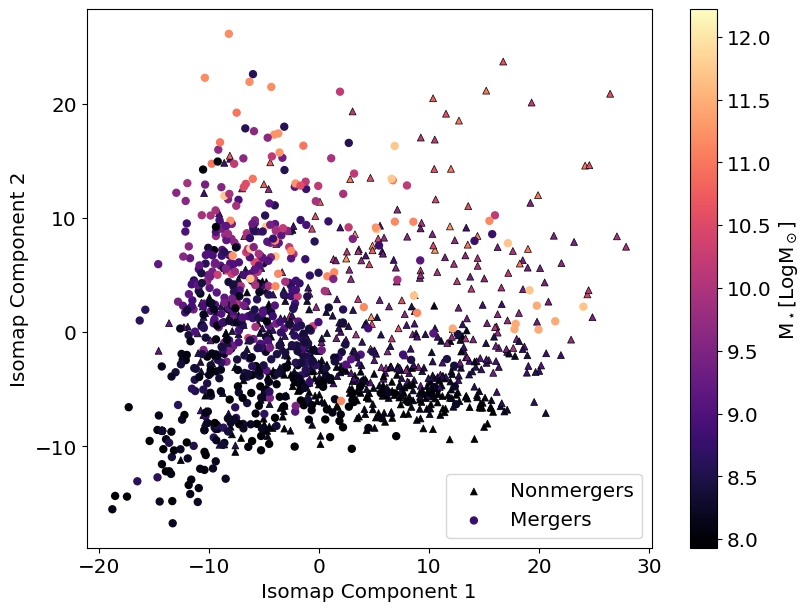

In [120]:
masses_in_order = []

for name in all_names:
    mass = ClassificationInfo.loc[ClassificationInfo['Image Name'] == str(name), 'Stellar Mass'].iloc[0]
    masses_in_order.append(mass)
masses_in_order = np.array(masses_in_order)

plt.figure(figsize=(8,6), constrained_layout=True) # Adjusted for colorbar
# Use a colormap suitable for continuous data, e.g., 'viridis', 'plasma', 'coolwarm', 'magma'
scatter = plt.scatter(
    isomap_results[:, 0][zero_ratio_indices],
    isomap_results[:, 1][zero_ratio_indices],
    c=masses_in_order[zero_ratio_indices], # Color by mass
    cmap='magma',       # Choose a colormap
    #alpha=0.7,
    #vmax = 12.5,
    marker = '^',
    s=25,
    edgecolor = 'k',
    linewidth = 0.5,
    label = 'Nonmergers',
    norm = norm_mass
)


scatter = plt.scatter(
    isomap_results[:, 0][non_zero_ratio_indices],
    isomap_results[:, 1][non_zero_ratio_indices],
    c=masses_in_order[non_zero_ratio_indices], # Color by mass
    cmap='magma',       # Choose a colormap
    #alpha=0.7,
    s=25, #np.array(sfrs_in_order)[non_zero_ratio_indices]*3,
    label = 'Mergers',
    norm = norm_mass
    #,vmax = 75,
    
)
#plt.title('Isomap projection (colored by Galaxy Mass)')
plt.xlabel('Isomap Component 1', fontsize = 'x-large')
plt.ylabel('Isomap Component 2', fontsize = 'x-large')
plt.legend(fontsize = 'x-large')
plt.xticks(fontsize = 'x-large')
plt.yticks(fontsize = 'x-large')
# Add a colorbar to show the mass scale
cbar = plt.colorbar(scatter)
cbar.set_label(r'M$_\star$[LogM$_\odot$] ', fontsize = 'x-large') # Update label with units
cbar.ax.tick_params(labelsize='x-large')
plt.savefig('isomap_mass.png', dpi = 300)
plt.show()

# Umap

In [121]:
reducer = umap.UMAP(n_components=2, n_neighbors=15, random_state=626)

umap_embedding = reducer.fit_transform(all_extracted_features)

/n/home09/aschechter/.conda/envs/zoobot-py310/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [122]:
print("UMAP embedding shape:", umap_embedding.shape) # Should be (num_samples, 2)

UMAP embedding shape: (1260, 2)


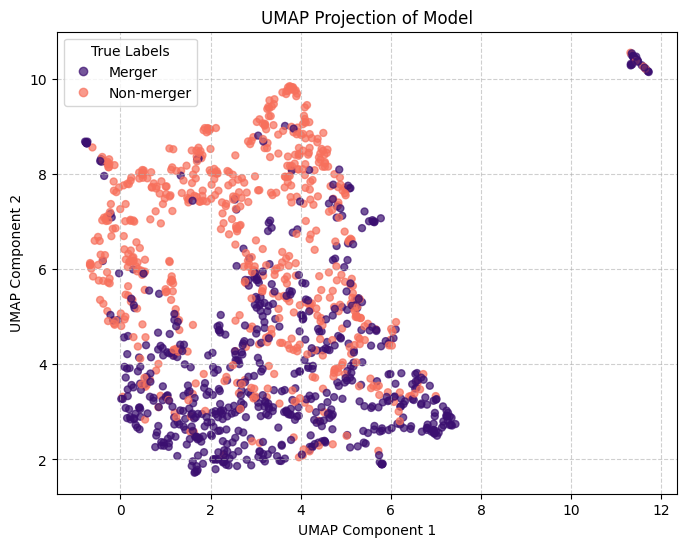

In [123]:
plt.figure(figsize=(8, 6))

# Define custom labels for the legend
custom_labels = {0: 'Merger', 1: 'Non-merger'}
legend_labels = [custom_labels[label] for label in sorted(np.unique(all_labels))]

# You can color the points by their true labels (all_labels)
# or by predicted labels (all_preds) to see how well they separate.
scatter = plt.scatter(
    umap_embedding[:, 0],
    umap_embedding[:, 1],
    c=all_labels, # Color by true labels
    cmap=cmap_binary, # Choose a colormap, e.g., 'viridis', 'plasma', 'coolwarm'
    s=25,           # Marker size
    alpha=0.7       # Transparency
)

# Add legend for true labels
handles, _ = scatter.legend_elements() # Get default handles for the scatter points
plt.legend(handles=handles, labels=legend_labels, title="True Labels")

plt.title('UMAP Projection of Model')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

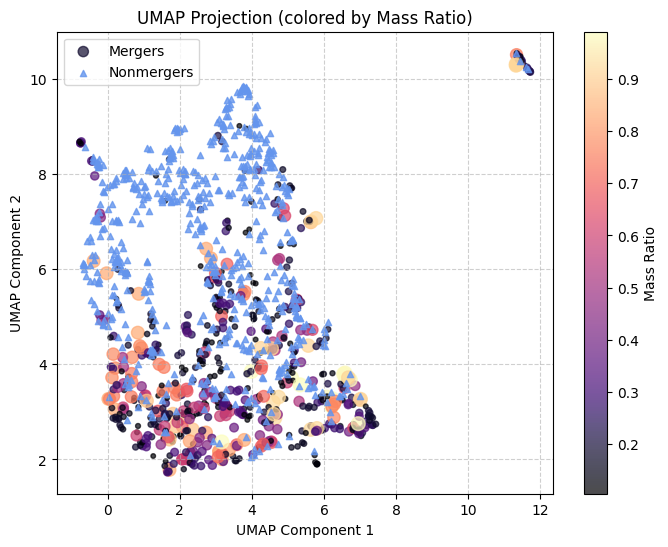

In [124]:
plt.figure(figsize=(8,6))

# Identify indices for mass ratio = 0 and mass ratio != 0
# Filter out NaNs if any were introduced
valid_indices = ~np.isnan(ratios_in_order)
zero_ratio_indices = np.where((ratios_in_order == 0) & valid_indices)[0]
non_zero_ratio_indices = np.where((ratios_in_order != 0) & valid_indices)[0]

# 1. Plot galaxies with non-zero mass ratio (continuous colormap)
scatter_non_zero = plt.scatter(
    umap_embedding[non_zero_ratio_indices, 0],
    umap_embedding[non_zero_ratio_indices, 1],
    c=ratios_in_order[non_zero_ratio_indices], # Color by mass ratio
    cmap='magma',       # Choose a colormap for continuous data (e.g., 'viridis', 'plasma', 'magma')
    alpha=0.7,
    s = np.array(ratios_in_order[non_zero_ratio_indices])*100,
    label='Mergers'
)

# Add a colorbar for the continuous mass ratios
cbar = plt.colorbar(scatter_non_zero)
cbar.set_label('Mass Ratio')

# 2. Plot galaxies with mass ratio = 0 (distinct fixed color)
scatter_zero = plt.scatter(
    umap_embedding[zero_ratio_indices, 0],
    umap_embedding[zero_ratio_indices, 1],
    color='cornflowerblue',       # Choose a distinct color (e.g., 'red', 'blue', 'lime', 'cyan')
    alpha=0.8,
    s=20,               # Make them slightly larger or use a different marker for emphasis
    marker='^',
    label='Nonmergers'
)

plt.title('UMAP Projection (colored by Mass Ratio)')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.grid(True, linestyle='--', alpha=0.6)

# Add a legend for the fixed-color 'Mass Ratio = 0' points
plt.legend(loc='best') # 'best' attempts to place it where it won't overlap much

plt.show()


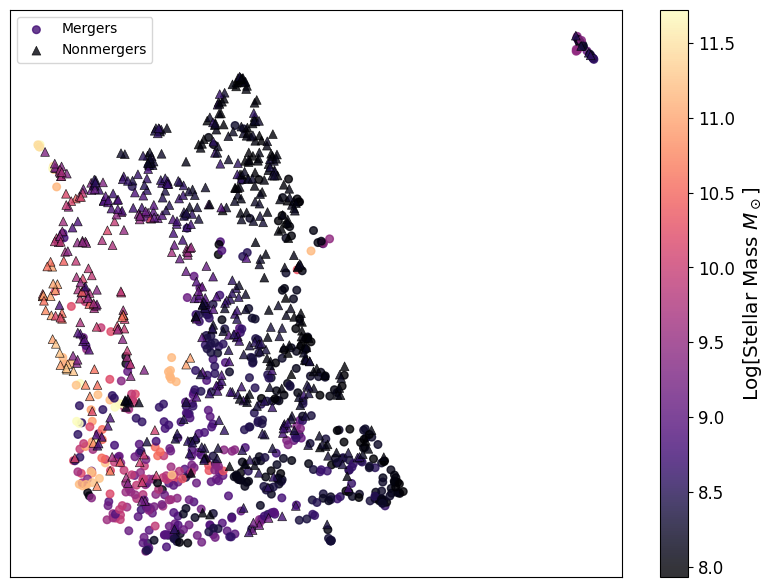

In [125]:
vmin = masses_in_order.min()
vmax = masses_in_order.max()
plt.figure(figsize=(8,6)) # Adjusted for colorbar
# Use a colormap suitable for continuous data, e.g., 'viridis', 'plasma', 'coolwarm', 'magma'
# scatter = plt.scatter(
#     umap_embedding[:, 0],
#     umap_embedding[:, 1],
#     c=masses_in_order, # Color by mass
#     cmap='magma',       # Choose a colormap
#     alpha=0.7,
#     s=np.array(masses_in_order) * 2
# )

# 1. Plot galaxies with non-zero mass ratio (continuous colormap)
scatter_non_zero = plt.scatter(
    umap_embedding[non_zero_ratio_indices, 0],
    umap_embedding[non_zero_ratio_indices, 1],
    c=masses_in_order[non_zero_ratio_indices], # Color by mass ratio
    cmap='magma',#'magma',  
    vmin=vmin, vmax=vmax,  # Sync color scale,
    # Choose a colormap for continuous data (e.g., 'viridis', 'plasma', 'magma')
    alpha=0.8,
    s = 30,
    label='Mergers'
)

# Add a colorbar for the continuous mass ratios
cbar = plt.colorbar(scatter_non_zero)
cbar.set_label(r'Log[Stellar Mass $M_\odot$]', fontsize = 'x-large')
cbar.ax.tick_params(labelsize='large')

# 2. Plot galaxies with mass ratio = 0 (distinct fixed color)
scatter_zero = plt.scatter(
    umap_embedding[zero_ratio_indices, 0],
    umap_embedding[zero_ratio_indices, 1],
    c=masses_in_order[zero_ratio_indices],       # Choose a distinct color (e.g., 'red', 'blue', 'lime', 'cyan')
    alpha=0.8,
    cmap = 'magma',
    vmin=vmin, vmax=vmax,  # Sync color scale
    s=40,               # Make them slightly larger or use a different marker for emphasis
    marker='^',
    edgecolors='black',
    linewidths=0.5,
    label='Nonmergers'
)

#plt.title('UMAP projection (colored by Galaxy Mass)')
# plt.xlabel('UMAP Component 1')
# plt.ylabel('UMAP Component 2')
plt.tick_params(axis='both',          # Apply to both x and y axes
                which='both',         # Apply to both major and minor ticks
                bottom=False,         # Turn off ticks along the bottom edge
                top=False,            # Turn off ticks along the top edge
                left=False,           # Turn off ticks along the left edge
                right=False,          # Turn off ticks along the right edge
                labelbottom=False,    # Turn off labels along the bottom edge
                labelleft=False) 
# # Add a colorbar to show the mass scale
# cbar = plt.colorbar(scatter)
# cbar.set_label('Stellar Mass') # Update label with units
plt.legend()
plt.tight_layout()
plt.savefig('umap_stellarmass.png', dpi = 300)
plt.show()

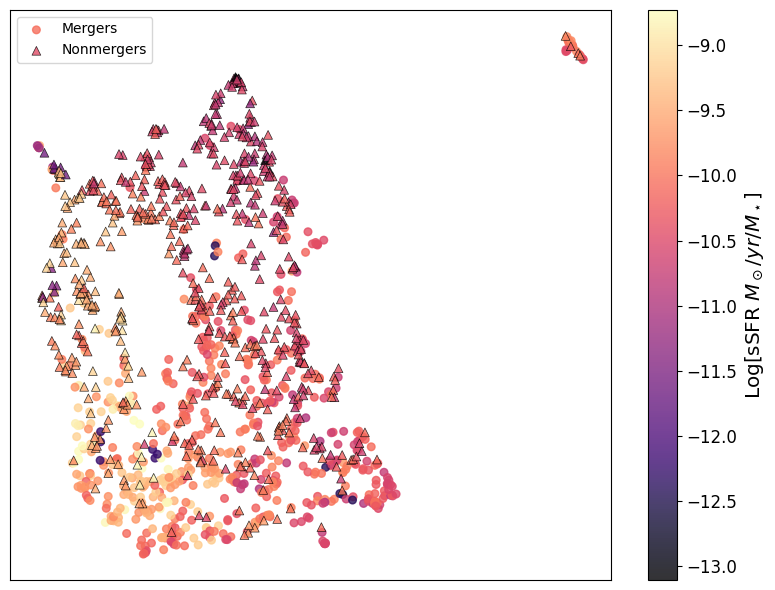

In [126]:
ssfrs_in_order = np.array(np.array(sfrs_in_order)/((np.array(masses_in_order)**(10))))
ssfrs_in_order = np.log10(ssfrs_in_order)
vmin = ssfrs_in_order.min()
vmax = ssfrs_in_order.max()
#print(ssfrs_in_order)
plt.figure(figsize=(8,6)) # Adjusted for colorbar
# Use a colormap suitable for continuous data, e.g., 'viridis', 'plasma', 'coolwarm', 'magma'
# scatter = plt.scatter(
#     umap_embedding[:, 0],
#     umap_embedding[:, 1],
#     c=sfrs_in_order, # Color by mass
#     cmap='magma',       # Choose a colormap
#     alpha=0.7,
#     s=np.array(sfrs_in_order) * 2
# )

# 1. Plot galaxies with non-zero mass ratio (continuous colormap)
scatter_non_zero = plt.scatter(
    umap_embedding[non_zero_ratio_indices, 0],
    umap_embedding[non_zero_ratio_indices, 1],
    c=ssfrs_in_order[non_zero_ratio_indices], # Color by mass ratio
    cmap='magma',#'magma',  
    vmin=vmin, vmax=vmax,  # Sync color scale,
    # Choose a colormap for continuous data (e.g., 'viridis', 'plasma', 'magma')
    alpha=0.8,
    s = 30,
    label='Mergers'
)

# Add a colorbar for the continuous mass ratios
cbar = plt.colorbar(scatter_non_zero)
cbar.set_label(r'Log[sSFR $M_\odot/yr/M_\star$]', fontsize = 'x-large')
cbar.ax.tick_params(labelsize='large')
# 2. Plot galaxies with mass ratio = 0 (distinct fixed color)
scatter_zero = plt.scatter(
    umap_embedding[zero_ratio_indices, 0],
    umap_embedding[zero_ratio_indices, 1],
    c=ssfrs_in_order[zero_ratio_indices],       # Choose a distinct color (e.g., 'red', 'blue', 'lime', 'cyan')
    alpha=0.8,
    cmap = 'magma',
    vmin=vmin, vmax=vmax,  # Sync color scale
    s=40,               # Make them slightly larger or use a different marker for emphasis
    marker='^',
    edgecolors='black',
    linewidths=0.5,
    label='Nonmergers'
)

# plt.title('UMAP projection (colored by sSFR)')
# plt.xlabel('UMAP Component 1')
# plt.ylabel('UMAP Component 2')
plt.tick_params(axis='both',          # Apply to both x and y axes
                which='both',         # Apply to both major and minor ticks
                bottom=False,         # Turn off ticks along the bottom edge
                top=False,            # Turn off ticks along the top edge
                left=False,           # Turn off ticks along the left edge
                right=False,          # Turn off ticks along the right edge
                labelbottom=False,    # Turn off labels along the bottom edge
                labelleft=False) 
# # Add a colorbar to show the mass scale
# cbar = plt.colorbar(scatter)
# cbar.set_label('Stellar Mass') # Update label with units
plt.legend()
plt.tight_layout()
plt.savefig('umap_ssfr.png', dpi = 300)

plt.show()

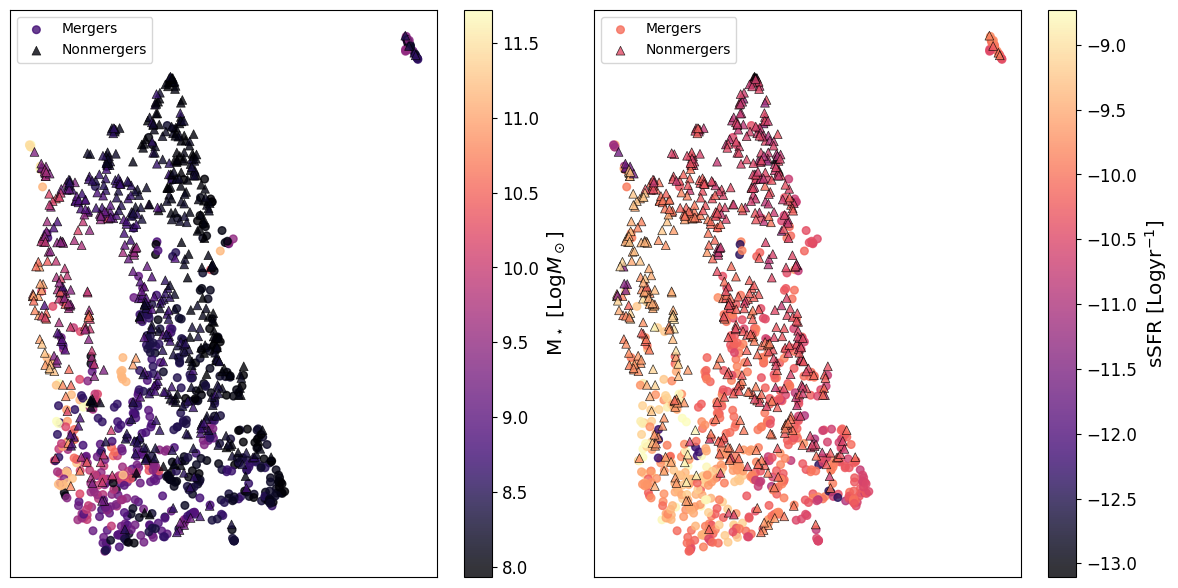

In [127]:
vmin_mass = masses_in_order.min()
vmax_mass = masses_in_order.max()
vmin_ssfr = ssfrs_in_order.min()
vmax_ssfr = ssfrs_in_order.max()
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (12, 6))

# 1. Plot galaxies with non-zero mass ratio (continuous colormap)
scatter_non_zero = ax1.scatter(
    umap_embedding[non_zero_ratio_indices, 0],
    umap_embedding[non_zero_ratio_indices, 1],
    c=masses_in_order[non_zero_ratio_indices], # Color by mass ratio
    cmap='magma',#'magma',  
    vmin=vmin_mass, vmax=vmax_mass,  # Sync color scale,
    # Choose a colormap for continuous data (e.g., 'viridis', 'plasma', 'magma')
    alpha=0.8,
    s = 30,
    label='Mergers'
)

# Add a colorbar for the continuous mass ratios
cbar = fig.colorbar(scatter_non_zero, ax=ax1)
cbar.set_label(r'M$_\star$ [Log$M_\odot$]', fontsize='x-large')
cbar.ax.tick_params(labelsize='large')

# 2. Plot galaxies with mass ratio = 0 (distinct fixed color)
scatter_zero = ax1.scatter(
    umap_embedding[zero_ratio_indices, 0],
    umap_embedding[zero_ratio_indices, 1],
    c=masses_in_order[zero_ratio_indices],       # Choose a distinct color (e.g., 'red', 'blue', 'lime', 'cyan')
    alpha=0.8,
    cmap = 'magma',
    vmin=vmin_mass, vmax=vmax_mass,  # Sync color scale
    s=40,               # Make them slightly larger or use a different marker for emphasis
    marker='^',
    edgecolors='black',
    linewidths=0.5,
    label='Nonmergers'
)


ax1.tick_params(axis='both',          # Apply to both x and y axes
                which='both',         # Apply to both major and minor ticks
                bottom=False,         # Turn off ticks along the bottom edge
                top=False,            # Turn off ticks along the top edge
                left=False,           # Turn off ticks along the left edge
                right=False,          # Turn off ticks along the right edge
                labelbottom=False,    # Turn off labels along the bottom edge
                labelleft=False) 

ax1.legend()

scatter_non_zero = ax2.scatter(
    umap_embedding[non_zero_ratio_indices, 0],
    umap_embedding[non_zero_ratio_indices, 1],
    c=ssfrs_in_order[non_zero_ratio_indices], # Color by mass ratio
    cmap='magma',#'magma',  
    vmin=vmin_ssfr, vmax=vmax_ssfr,  # Sync color scale,
    # Choose a colormap for continuous data (e.g., 'viridis', 'plasma', 'magma')
    alpha=0.8,
    s = 30,
    label='Mergers'
)

# Add a colorbar for the continuous mass ratios
cbar2 = fig.colorbar(scatter_non_zero, ax=ax2)
cbar2.set_label(r'sSFR [Logyr$^{-1}$]', fontsize='x-large')
cbar2.ax.tick_params(labelsize='large')
# 2. Plot galaxies with mass ratio = 0 (distinct fixed color)
scatter_zero = ax2.scatter(
    umap_embedding[zero_ratio_indices, 0],
    umap_embedding[zero_ratio_indices, 1],
    c=ssfrs_in_order[zero_ratio_indices],       # Choose a distinct color (e.g., 'red', 'blue', 'lime', 'cyan')
    alpha=0.8,
    cmap = 'magma',
    vmin=vmin_ssfr, vmax=vmax_ssfr,  # Sync color scale
    s=40,               # Make them slightly larger or use a different marker for emphasis
    marker='^',
    edgecolors='black',
    linewidths=0.5,
    label='Nonmergers'
)

# ax2.title('UMAP projection (colored by sSFR)')
# ax2.xlabel('UMAP Component 1')
# ax2.ylabel('UMAP Component 2')
ax2.tick_params(axis='both',          # Apply to both x and y axes
                which='both',         # Apply to both major and minor ticks
                bottom=False,         # Turn off ticks along the bottom edge
                top=False,            # Turn off ticks along the top edge
                left=False,           # Turn off ticks along the left edge
                right=False,          # Turn off ticks along the right edge
                labelbottom=False,    # Turn off labels along the bottom edge
                labelleft=False) 
# # Add a colorbar to show the mass scale
# cbar = ax2.colorbar(scatter)
# cbar.set_label('Stellar Mass') # Update label with units
ax2.legend()

plt.tight_layout()
plt.savefig('UMAP_mass_ssfr_panel.png', dpi=300)
plt.show()

## UMAP clump

In [128]:
print(all_names[umap_embedding[:,0] > 6])

['437412_6' '541965_2' '531709_6' '483393_6' '553053_3' '527829_1'
 '439679_4' '474784_5' '203574_1' '431683_1' '595535_6' '527829_2'
 '366272_2' '412395_3' '514427_5' '577979_2' '179012_5' '513935_3'
 '541965_5' '474784_3' '459478_2' '439679_2' '286306_2' '79633_4'
 '79633_1' '675083_5' '459478_3' '523112_3' '366272_4' '223377_2'
 '514427_1' '514427_3' '496012_3' '496012_2' '453895_4' '568162_3'
 '470024_3' '511733_1' '568162_5' '518941_3' '483393_5' '584953_4'
 '518941_2' '540520_5' '531709_1' '511733_3' '465345_5' '286306_5'
 '496012_5' '553283_3' '412395_1' '511733_5' '675083_6' '514427_6'
 '465345_3' '553053_5' '553283_1' '514427_4' '553283_5' '540520_2'
 '553283_6' '499276_3' '286306_4' '496012_4' '561654_2' '511733_2'
 '518941_5' '523112_2' '603110_3' '523112_4' '541965_6' '539924_1'
 '584953_3' '470024_5' '186578_2' '223377_6' '513935_5' '437919_4'
 '541965_1' '499276_5' '286306_3' '610251_5' '675083_1' '571589_2'
 '483393_3' '523112_5' '537900_1' '541965_4' '483393_4' '527829_

In [129]:
if tsne == 'yes':
    continue
else:
    STOP

SyntaxError: 'continue' not properly in loop (3533268638.py, line 2)

# tsne

In [ ]:
#t-SNE plot!
print('shape preds', np.shape(all_extracted_features))
perplexity = [5, 10, 15, 20, 30, 50, 70, 100] #changing this really changes results
colors_tSNE = [nonmergers_color if label == 1 else mergers_color for label in all_labels] 
for p in perplexity:
    tSNE = TSNE(n_components = 2, perplexity= p, learning_rate="auto")
    tSNE_transforms = tSNE.fit_transform(all_extracted_features)
    plt.figure()
    plt.scatter(tSNE_transforms[:, 0], tSNE_transforms[:, 1], c = colors_tSNE)
    plt.title('t-SNE visualization | perplexity = ' + str(p))
    plt.xlabel('t-SNE component 1')
    plt.ylabel('t-SNE component 2')
    plt.savefig('tsne/tSNE_perplexity' + str(p) + '.png')
    plt.show()


: 

: 

In [ ]:
#t-SNE plot by mass!
print('shape preds', np.shape(all_logits))
perplexity = [30, 70, 100] #changing this really changes results
#colors_tSNE = ['orange' if label == 1 else 'purple' for label in all_labels] 
for p in perplexity:
    tSNE = TSNE(n_components = 2, perplexity= p, learning_rate="auto")
    tSNE_transforms = tSNE.fit_transform(all_logits)
    plt.figure()
        # 1. Plot galaxies with non-zero mass ratio (continuous colormap)
    scatter_non_zero = plt.scatter(
        tSNE_transforms[non_zero_ratio_indices, 0],
        tSNE_transforms[non_zero_ratio_indices, 1],
        c=ratios_in_order[non_zero_ratio_indices], # Color by mass ratio
        cmap='magma',       # Choose a colormap for continuous data (e.g., 'viridis', 'plasma', 'magma')
        alpha=0.7,
        s=20,
        label='Mass Ratio > 0'
    )

    # Add a colorbar for the continuous mass ratios
    cbar = plt.colorbar(scatter_non_zero)
    cbar.set_label('Mass Ratio')

    # 2. Plot galaxies with mass ratio = 0 (distinct fixed color)
    scatter_zero = plt.scatter(
        tSNE_transforms[zero_ratio_indices, 0],
        tSNE_transforms[zero_ratio_indices, 1],
        color='cornflowerblue',       # Choose a distinct color (e.g., 'red', 'blue', 'lime', 'cyan')
        alpha=0.8,
        s=20,               # Make them slightly larger or use a different marker for emphasis
        marker='o',
        label='Mass Ratio = 0'
    )
    plt.title('t-SNE visualization | perplexity = ' + str(p))
    plt.xlabel('t-SNE component 1')
    plt.ylabel('t-SNE component 2')
    plt.savefig('tsne/tSNE_perplexity' + str(p) + '.png')
    plt.show()


: 

: 

In [ ]:
#t-SNE plot by mass!
print('shape preds', np.shape(all_logits))
perplexity = [30, 70, 100] #changing this really changes results
#colors_tSNE = ['orange' if label == 1 else 'purple' for label in all_labels] 
for p in perplexity:
    tSNE = TSNE(n_components = 2, perplexity= p, learning_rate="auto")
    tSNE_transforms = tSNE.fit_transform(all_logits)
    plt.figure()
        # 1. Plot galaxies with non-zero mass ratio (continuous colormap)
    #t-SNE plot by mass!
print('shape preds', np.shape(all_logits))
perplexity = [30, 70, 100] #changing this really changes results
#colors_tSNE = ['orange' if label == 1 else 'purple' for label in all_labels] 
for p in perplexity:
    tSNE = TSNE(n_components = 2, perplexity= p, learning_rate="auto")
    tSNE_transforms = tSNE.fit_transform(all_logits)
    plt.figure()
        # 1. Plot galaxies with non-zero mass ratio (continuous colormap)
    scatter = plt.scatter(
    isomap_results[:, 0],
    isomap_results[:, 1],
    c=masses_in_order, # Color by mass
    cmap='magma',       # Choose a colormap
    alpha=0.7,
    s=20
    )
    plt.title('t-SNE visualization | perplexity = ' + str(p))
    plt.xlabel('t-SNE component 1')
    plt.ylabel('t-SNE component 2')
    plt.savefig('tsne/tSNE_perplexity' + str(p) + '.png')
    plt.show()
    cbar = plt.colorbar(scatter)
    cbar.set_label('Mass Ratio')


: 

: 

# Only 10% Mergers

In [ ]:
sub = int(len(test_mergers_dataset_orig) * 0.1)
print(sub)

random_indices = torch.randperm(len(test_mergers_dataset_orig)).tolist()[:sub]
subset = Subset(test_mergers_dataset_orig, random_indices)

# Create a DataLoader for the subset
test_dataset_subset= torch.utils.data.ConcatDataset([subset, test_nonmergers_dataset_orig])
test_subset_loader = DataLoader(test_dataset_subset, batch_size=BATCH_SIZE, shuffle=False)

: 

: 

In [ ]:
all_labels_subset = []
all_preds_subset = []
all_names_subset = []
all_probabilities_subset = []


with torch.no_grad():  # No need to track gradients during inference
    for images, labels, names in tqdm(test_subset_loader):
        #print(type(names))
        images = torch.tensor(images, dtype=torch.float32).to(device)
        labels = torch.tensor(labels, dtype=torch.long).to(device)
        # Forward pass
        outputs = model(images)
        #print(outputs)
        #print(outputs.shape)
        probabilities = torch.softmax(outputs, dim=1)
        pred = torch.argmax(outputs, dim=1)   # Convert to binary (0 or 1)
        pred = pred.to(device=device) #dtype=torch.float32
        maxvals, pred_index = torch.max(outputs, 1)
        # Collect labels and predictions
        all_labels_subset.extend(labels.cpu().numpy())
        all_preds_subset.extend(pred.cpu().numpy())
        all_names_subset.extend(names)
        all_probabilities_subset.extend(probabilities.cpu().numpy())
# 4. Compute accuracy or other evaluation metrics (e.g., confusion matrix)
# Convert lists to numpy arrays
all_labels_subset = np.array(all_labels_subset)
#all_preds = np.squeeze(np.array(all_preds))
all_preds_subset = np.array(all_preds_subset)
all_names_subset = np.array(all_names_subset)
all_probabilities_subset = np.array(all_probabilities_subset)
test_accuracy_subset = get_accuracy(all_preds_subset, all_labels_subset)
#test_accuracy = np.mean(np.array(test_acc))
print(f"Subset Test Accuracy: {test_accuracy_subset:.2f}%")


: 

: 

In [ ]:
cm = confusion_matrix(all_labels_subset, all_preds_subset)
cmn = (cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]) *100 
plot_confusion_matrix(cmn, classes=['Merger', 'Non-merger'], epoch='Subset Test')


: 

: 

# Testing Contours

In [ ]:
print(test_dataloader.dataset[0])

: 

: 

In [ ]:
im = test_dataloader.dataset[10][0].unsqueeze(0).numpy()
print(type(im))
print(np.shape(np.sum(im, axis = 1)[0]))
im = np.sum(im, axis = 1)[0]
mean = np.mean(im)
std = np.std(im)
contour_levels = [mean + i * std for i in [1,3,5]]
fig, ax = plt.subplots()
ax.imshow(im, norm = LogNorm(), cmap = 'magma')
ax.contour(im, colors = 'white', levels = contour_levels)
plt.show()

: 

: 

In [ ]:
threshold = mean + std
segmap = detect_sources(np.log10(im), np.log10(threshold), npixels = 500)
print(segmap.nlabels)
plt.figure()
plt.imshow(segmap)
plt.show()
print(segmap.data[segmap.data == 1].size)
print(segmap.data[segmap.data == 0].size)
print(224*224)

: 

: 

In [ ]:
for image in test_dataloader.dataset[0][0].unsqueeze(0).numpy():
    im = test_dataloader.dataset[0][0].unsqueeze(0).numpy()

: 

: 

: 

: 

In [ ]:
bg = glob.glob('/n/holystore01/LABS/hernquist_lab/Users/aschechter/background_cutouts/*150.1733263597_2.3234301196.npy')
print(len(bg))
b0 = resize(np.load(bg[0]), (154,154))
b1 = resize(np.load(bg[1]), (154,154))
b2 = resize(np.load(bg[2]), (154,154))
b3 = resize(np.load(bg[3]), (154,154))
bkgsum = b0+b1+b2+b3
bkgsum = bkgsum * 1e20
norm = simple_norm(bkgsum, 'log', log_a=2e5)
bkgsum = norm(bkgsum)
plt.figure()
plt.imshow(bkgsum[0:40,100:])
plt.show()

bkmean = np.mean(bkgsum[0:40,100:])
bkstd = np.std(bkgsum[0:40,100:])

: 

: 

In [ ]:
%matplotlib inline

: 

: 

In [ ]:
counter = 0
for batch_idx, (images, labels, names) in enumerate(test_dataloader):
    if batch_idx == 0: #plot only first batch while testing
        # Loop through images in the batch
        for image_idx, (image, name) in enumerate(zip(images, names)):
    #         print('hello')
            image = image.numpy()
            z1path = '/n/holystore01/LABS/hernquist_lab/Users/aschechter/mocks_nobackground_z1/' + name + 'wfc3_ir_f125w.npy'
            z15path = '/n/holystore01/LABS/hernquist_lab/Users/aschechter/mocks_nobackground_z15/' + name + 'wfc3_ir_f125w.npy'
            #print(z1path)
            if os.path.exists(z1path):
                #print('z1')
                all = glob.glob('/n/holystore01/LABS/hernquist_lab/Users/aschechter/mocks_nobackground_z1/' + name + '*.npy')
                i0 = resize(np.load(all[0]), (224,224))
                i1 = resize(np.load(all[1]), (224,224))
                i2 = resize(np.load(all[2]), (224,224))
                i3 = resize(np.load(all[3]), (224,224))
                ibig = i0 + i1 + i2 + i3
                mean = np.mean(ibig)
                std = np.std(ibig) 
                contour_levels = [mean + i * std for i in [1,3,5]]
                #print(len(all))
            elif os.path.exists(z15path):
                #print('z15')
                all = glob.glob('/n/holystore01/LABS/hernquist_lab/Users/aschechter/mocks_nobackground_z15/' + name + '*.npy')
                i0 = resize(np.load(all[0]), (224,224))
                i1 = resize(np.load(all[1]), (224,224))
                i2 = resize(np.load(all[2]), (224,224))
                i3 = resize(np.load(all[3]), (224,224))
                ibig = i0 + i1 + i2 + i3
                mean = np.mean(ibig)
                std = np.std(ibig) 
                contour_levels = [mean + i * std for i in [1,3,5]]
                #print(len(all))
            else:
                print('uhhh')
    #         #print(type(image), np.shape(image))
    #         #print(np.shape(np.sum(image, axis = 0)))
    #         image = np.sum(image, axis = 0)
    #         mean = np.mean(image)
    #         std = np.std(image)        
    #         threshold = bkmean + 3* bkstd
    #         try:
    #             segmap = detect_sources(image, threshold, npixels = 50)
    #             print(segmap)
    #             if segmap.nlabels > 1:
    #                 fig, (ax1, ax2)  = plt.subplots(1,2)
    #                 ax1.imshow(image, norm = LogNorm(), cmap = 'magma')
    #                 ax1.contour(image, colors = 'white', levels = contour_levels)
    #                 ax2.imshow(segmap)
    #                 plt.savefig('segmap/' + str(counter) + '.png')
    #                 plt.show()
    #                 plt.clf()
    #             elif segmap.nlabels == 1:
    #                 fig, (ax1, ax2)  = plt.subplots(1,2)
    #                 ax1.imshow(image, norm = LogNorm(), cmap = 'magma')
    #                 ax1.contour(image, colors = 'white', levels = contour_levels)
    #                 ax2.imshow(segmap)
    #                 plt.savefig('segmap/' + str(counter) + '.png')
    #                 plt.show()
    #                 plt.clf()
    #         except AttributeError:
    #             fig, ax = plt.subplots()
    #             ax.imshow(image, norm = LogNorm(), cmap = 'magma')
    #             ax.contour(image, colors = 'white', levels = contour_levels)
    #             ax.set_title('NO SOURCE')
    #             plt.savefig('segmap/' + str(counter) + '.png')
    #             plt.show()
    #             plt.clf()
    #         counter += 1
        

: 

: 

: 

: 